In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os,sys, gc
import keras

dirpath = os.getcwd().split("code")[0]+"code/"
sys.path.append(dirpath)
from pre_process import clean_LC,generate_representation
from evaluation import calculate_metrics, evaluate_metadata, evaluate_metadata_raw


folder = "../../KOI_Data/"
folder_lc = "/work/work_teamEXOPLANET/KOI_LC/"

Using TensorFlow backend.
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/users/fmena/anaconda3/

### Load Metadata and pre-process

In [2]:
def impute_on_pandas(df):
    return df.fillna(df.median(),inplace=False)

df_meta = pd.read_csv(folder+"/kepler_dataset.csv")
all_labels = df_meta["NExScI Disposition"]
mask_conf = (all_labels=="CONFIRMED").values
mask_fp = (all_labels=="FALSE POSITIVE").values
mask_cand = (all_labels=="CANDIDATE").values

metadata_used = ["Period"]

df_meta_obj = df_meta[metadata_used]
mask_nan = pd.isna(df_meta_obj)

df_meta_obj = impute_on_pandas(df_meta_obj)

df_meta_obj.head()

Period
0    8.884923
1    5.092465
2  275.073650
3    8.460439
4   21.761298

In [3]:
df_sets = pd.read_csv(folder+"/koi_sets_unb.csv") 
mask_train = (df_sets["Set"] == "Train").values
mask_test = (df_sets["Set"] == "Test").values
mask_unlabeled = (df_sets["Set"] == "Unlabeled").values

mask_train_conf = mask_train & mask_conf
mask_test_conf = mask_test & mask_conf

In [4]:
Y_train = df_meta_obj.values[mask_train_conf]
Y_test = df_meta_obj.values[mask_test_conf]
Y_train.shape

(1776, 1)

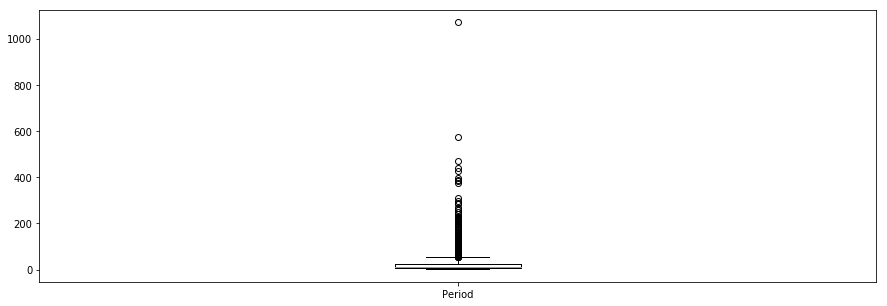

Period
count  1776.000000
mean     26.770958
std      53.253481
min       0.341842
25%       5.012505
50%      11.326234
75%      25.372859
max    1071.232624

In [5]:
### boxplot de las variables..
plt.figure(figsize=(15,5))
plt.boxplot(Y_train)
plt.xticks(np.arange(len(metadata_used))+1,metadata_used)
plt.show()
aux_df = pd.DataFrame(Y_train)
aux_df.columns = metadata_used
aux_df.describe()

In [6]:
#pre-process: scale metadata
from sklearn.preprocessing import StandardScaler, RobustScaler
#scaler_meta = RobustScaler()
scaler_meta = StandardScaler()

Ystd_train = scaler_meta.fit_transform(Y_train)
Ystd_test = scaler_meta.transform(Y_test)

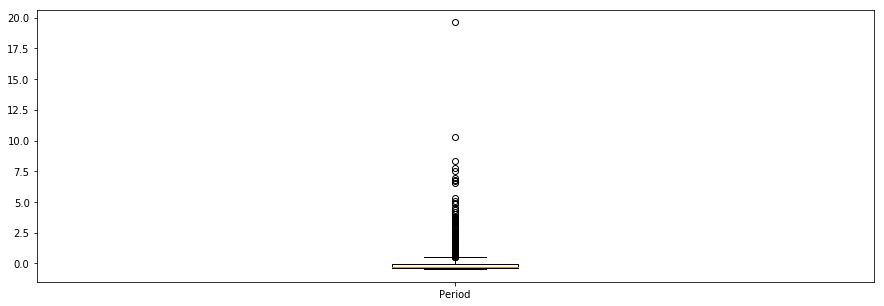

Period
count  1.776000e+03
mean  -1.850372e-17
std    1.000282e+00
min   -4.964288e-01
25%   -4.086978e-01
50%   -2.901045e-01
75%   -2.626105e-02
max    1.961855e+01

In [7]:
### boxplot de las variables..
plt.figure(figsize=(15,5))
plt.boxplot(Ystd_train)
plt.xticks(np.arange(len(metadata_used))+1,metadata_used)
plt.show()
aux_df = pd.DataFrame(Ystd_train)
aux_df.columns = metadata_used
aux_df.describe()

### Read light curves processed (detrended)

(8054, 71427)


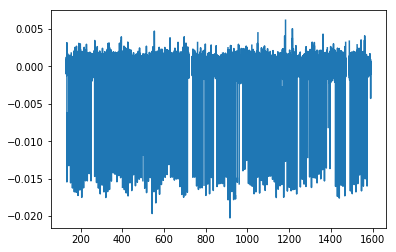

In [8]:
time_kepler = np.load(folder_lc+"npy/KOI_LC_time.npy")
#lc_kepler = np.load(folder_lc+"npy/KOI_LC_init.npy" )
process_lc = np.load(folder_lc+'/cleaned/LC_kepler_processed.npy')
N, T = time_kepler.shape
print((N,T))

plt.plot(time_kepler[0],process_lc[0])
plt.show()

In [9]:
time_kepler = time_kepler[mask_conf]
process_lc = process_lc[mask_conf]
N, T = time_kepler.shape
print((N,T))

(2281, 71427)


## Generate representation
> Continous values (with zeros)  
>> **Selected:** Coupled values (adding time) + delta time

In [10]:
for i in range(N):
    if i%1000 == 0:
        print("Va en el ",i)
    time_kepler[i], process_lc[i] = generate_representation(time_kepler[i], process_lc[i])

Va en el  0
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423941 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampli

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform samplin

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423954 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423954 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling


In [11]:
#borrar nans... arreglo variable
coupled_lc = []
coupled_time = []
delta_time = []
for i in range(N):
    mask_nan_aux = np.isnan(process_lc[i])
    coupled_lc.append(process_lc[i][~mask_nan_aux])
    
    time = time_kepler[i][~mask_nan_aux]
    # calculate delta time --> this could be done after padding is done..
    delta_time.append(np.hstack([[0],np.diff(time)]))
    coupled_time.append(time)
    
coupled_lc = np.asarray(coupled_lc)
coupled_time = np.asarray(coupled_time)
delta_time = np.asarray(delta_time)
coupled_time

array([array([ 131.5127147 ,  131.53314799,  131.55358129, ..., 1590.94020852,
       1590.96064181, 1590.98107511]),
       array([ 131.5126641 ,  131.53309739,  131.55353069, ..., 1590.94017122,
       1590.96060451, 1590.98103781]),
       array([ 131.5127088 ,  131.53314209,  131.55357539, ..., 1590.94023102,
       1590.96066431, 1590.98109761]),
       ...,
       array([ 131.5119906,  131.5324239,  131.5528572, ..., 1590.9400861,
       1590.9605194, 1590.9809527]),
       array([ 131.5119561,  131.5323894,  131.5528227, ..., 1590.9400454,
       1590.9604787, 1590.980912 ]),
       array([ 131.5119643,  131.5323976,  131.5528309, ..., 1590.9400596,
       1590.9604929, 1590.9809262])], dtype=object)

### Process --scale and center
> center?  
> With what value scale? (min, iqr, std)  
> Multiplicar por -1 por los max pooling?
>> **Selected:** normalizar (unit variance) --already median centered 

In [12]:
#pre-process seleccionado

coupled_lc_scaled = []
for i in range(coupled_lc.shape[0]):
    std_i = coupled_lc[i].std(keepdims=True)
    coupled_lc_scaled.append( coupled_lc[i]/std_i )
coupled_lc_scaled = np.asarray(coupled_lc_scaled)
coupled_lc_scaled.shape

(2281,)

In [13]:
#flip/mirror cada curva de luz.. (así se duplican los datos..) time: tambn y shift del 0 que sobra..

flip_coupled_lc_scaled = []
flip_delta_time = []
for i in range(coupled_lc.shape[0]):    
    flip_coupled_lc_scaled.append( coupled_lc_scaled[i][::-1] )
    flip_delta_time.append(  np.hstack([[0], delta_time[i][1:][::-1]]) )
    
flip_coupled_lc_scaled = np.asarray(flip_coupled_lc_scaled)
flip_delta_time = np.asarray(flip_delta_time)


delta_time = np.concatenate([flip_delta_time,delta_time])
coupled_lc_scaled = np.concatenate([flip_coupled_lc_scaled,coupled_lc_scaled])

del flip_delta_time, flip_coupled_lc_scaled
gc.collect()
coupled_lc_scaled.shape

(4562,)

### Padding for Keras

In [14]:
lens_lc = list(map(len,coupled_time))
max_len = np.max(lens_lc)

max_len = 64482 #as were builded


## do padding with keras..
X_time = keras.preprocessing.sequence.pad_sequences(delta_time,maxlen=max_len, value=0,dtype='float32',padding='post')
X_lc_scaled = keras.preprocessing.sequence.pad_sequences(coupled_lc_scaled,maxlen=max_len, value=0,dtype='float32',padding='post')
print("Shape with padding: ", X_lc_scaled.shape)

#need data with extra dim
X_lc_scaled = np.expand_dims(np.squeeze(X_lc_scaled),axis=-1)
X_time = np.expand_dims(np.squeeze(X_time),axis=-1)

T = X_lc_scaled.shape[1]
channels = 2
print("Shape with extra-dim: ", X_lc_scaled.shape)

X_lc_scaled

Shape with padding:  (4562, 64482)
Shape with extra-dim:  (4562, 64482, 1)


array([[[-0.08730856],
        [-3.0120108 ],
        [ 0.06760287],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[-0.27543724],
        [-9.160291  ],
        [ 0.7185589 ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[-0.15168639],
        [ 1.1390879 ],
        [-0.31746146],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       ...,

       [[-0.40176523],
        [ 0.55774933],
        [ 0.        ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[-0.96442634],
        [ 1.0596648 ],
        [ 0.4071325 ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 1.0009062 ],
        [ 0.29136676],
        [-1.8706189 ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]], dtype=float32)

### Load Encoder

In [15]:
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Input, Conv1D, Dense, Flatten, MaxPool1D, Reshape, UpSampling1D, Lambda, AveragePooling1D
from keras.layers import GlobalAveragePooling1D,GlobalMaxPool1D, TimeDistributed, GRU,LSTM, RepeatVector
from keras.layers import BatchNormalization, Dropout, ZeroPadding1D, ZeroPadding2D, Cropping1D, Cropping2D, Conv2D, Conv2DTranspose, MaxPool2D,UpSampling2D

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [16]:
### load encoder..
#encoder_model = keras.models.load_model("./trained_models/En_op4.h5")
#encoder_model = keras.models.load_model("./trained_models/En_op5.h5")
#encoder_model = keras.models.load_model("./trained_models/En_op4_doubleE.h5")

encoder_model = keras.models.load_model("./trained_models/En_op4_double_GRU1.h5")
#encoder_model = keras.models.load_model("./trained_models/En_op4_double_GRU1_Tsim.h5")


encoder_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 64482, 1)     0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 64482, 1)     0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 2015, 128)    164056      input_3[0][0]                    
__________________________________________________________________________________________________
model_2 (Model)                 (None, 2015, 128)    164056      input_4[0][0]                    
__________________________________________________________________________________________________
concatenat

/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


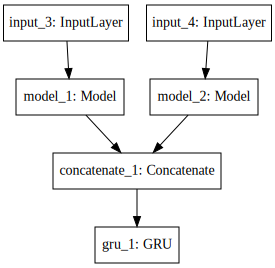

In [17]:
SVG(model_to_dot(encoder_model).create(prog='dot', format='svg'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64482, 1)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 64482, 8)          48        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 64482, 8)          328       
_________________________________________________________________
average_pooling1d_1 (Average (None, 32241, 8)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 32241, 16)         656       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 32241, 16)         1296      
_________________________________________________________________
average_pooling1d_2 (Average (None, 16120, 16)         0         
__________

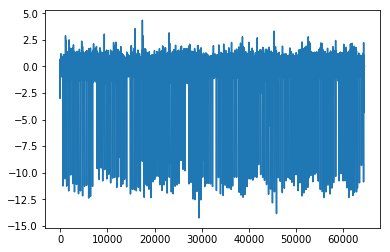

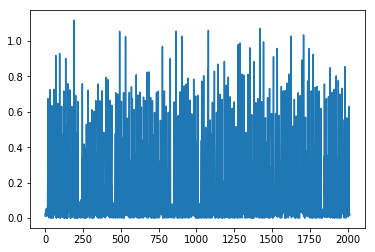

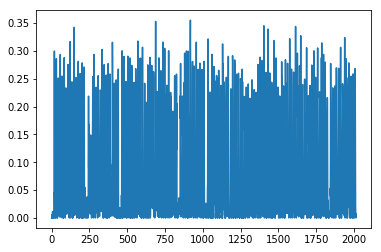

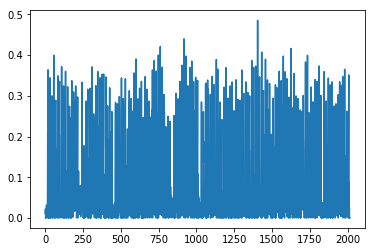

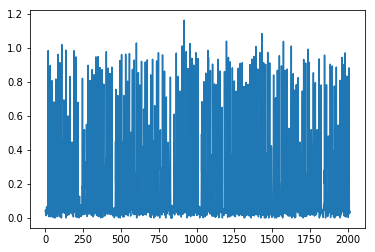

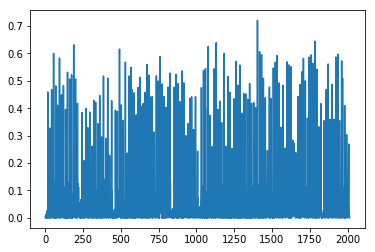

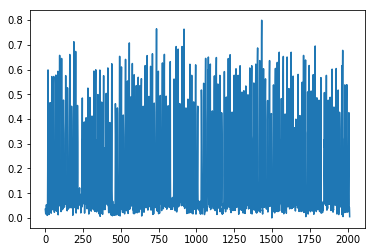

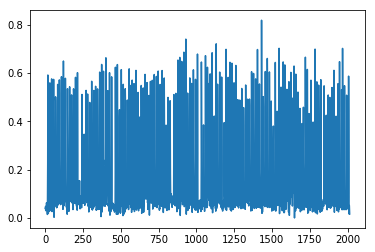

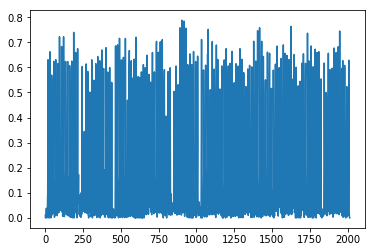

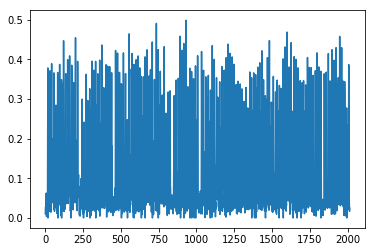

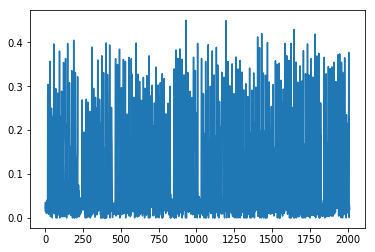

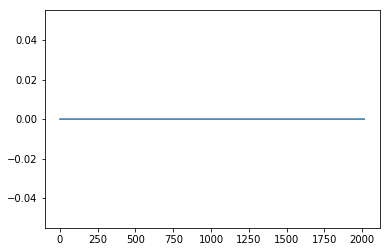

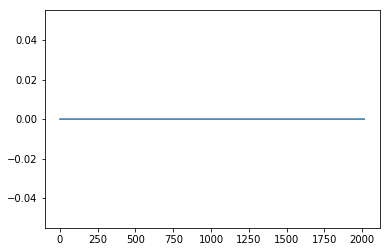

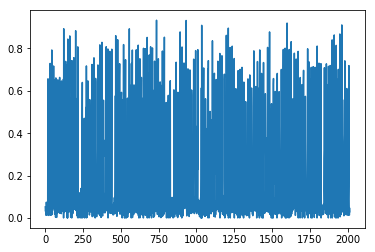

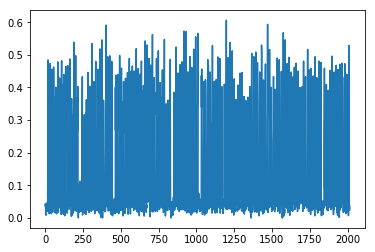

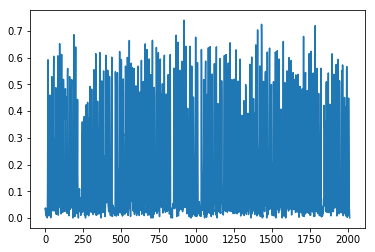

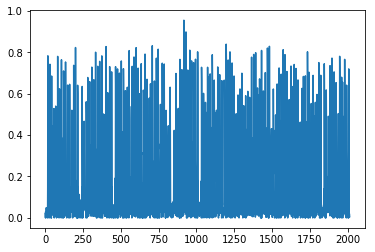

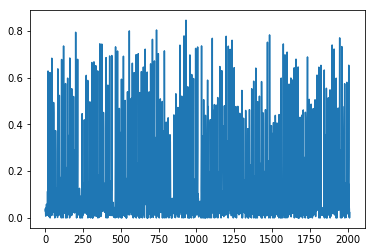

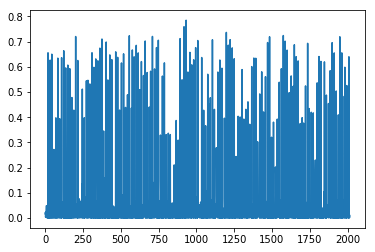

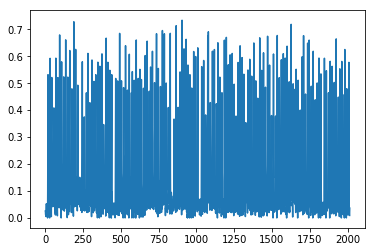

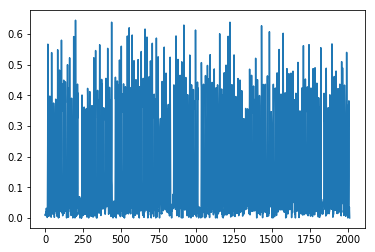

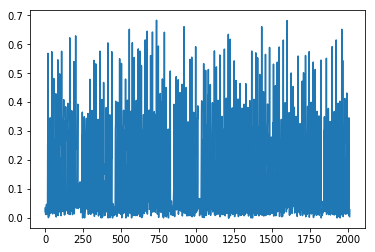

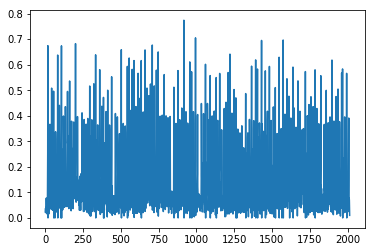

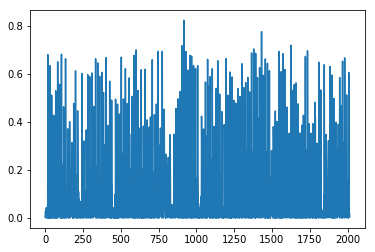

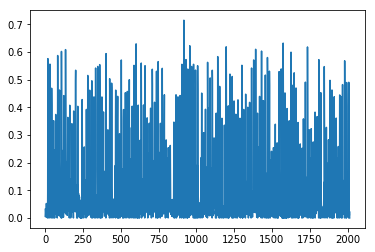

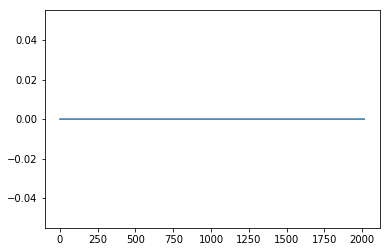

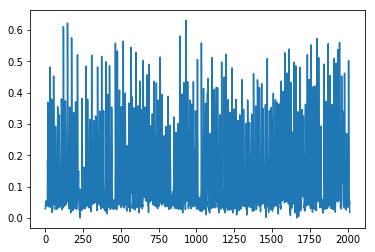

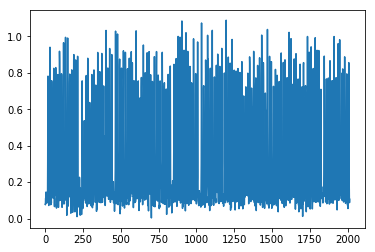

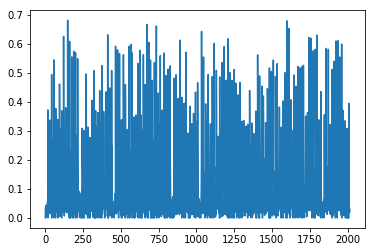

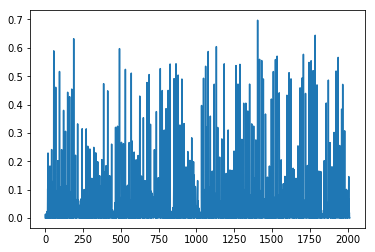

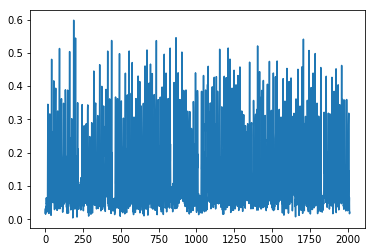

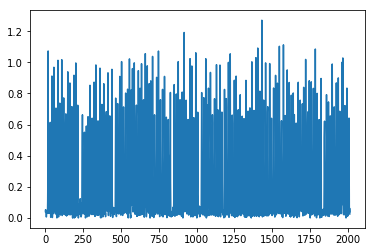

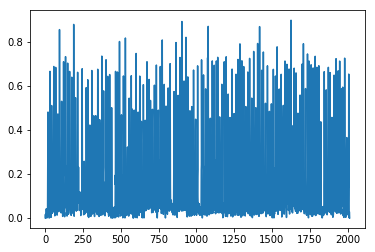

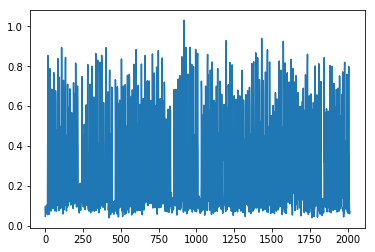

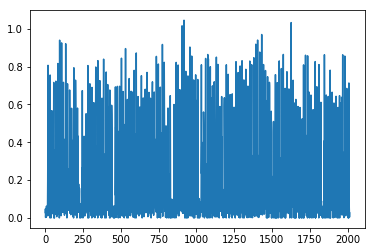

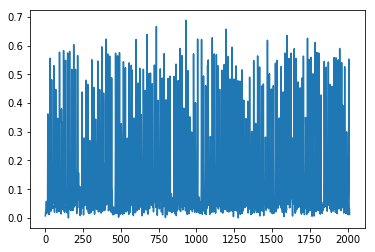

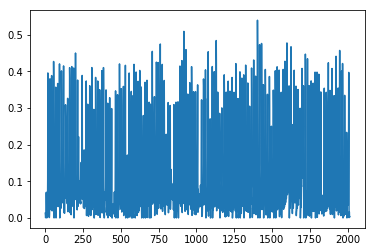

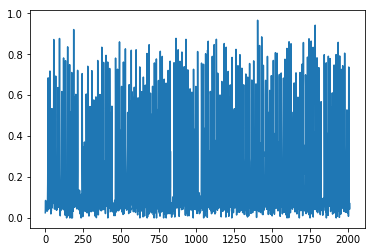

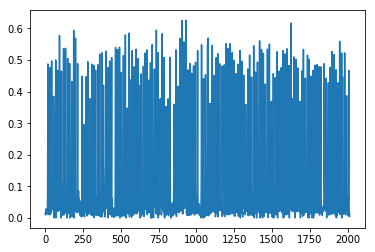

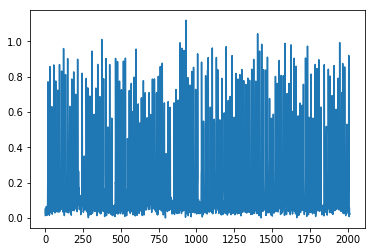

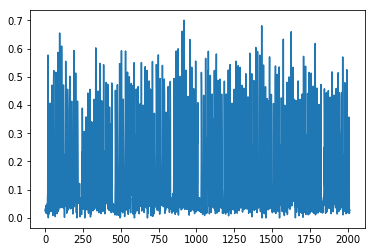

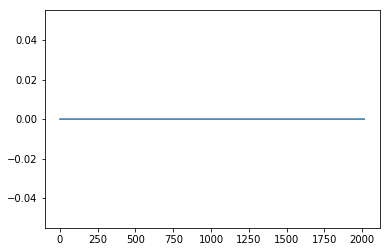

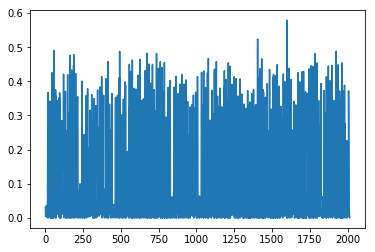

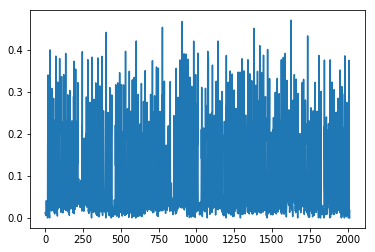

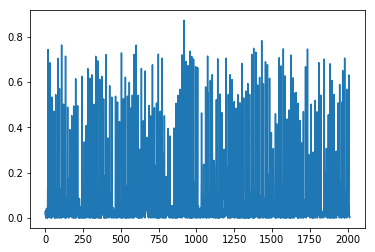

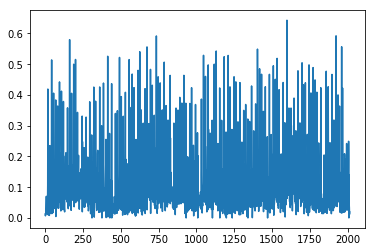

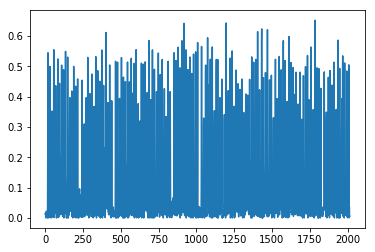

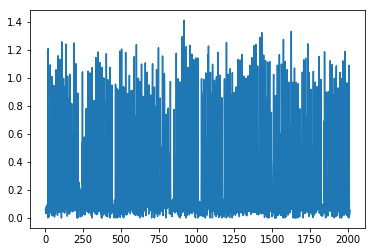

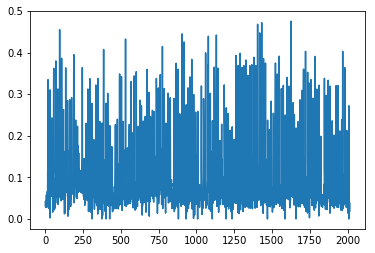

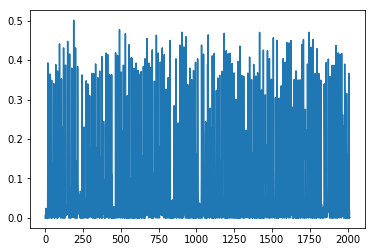

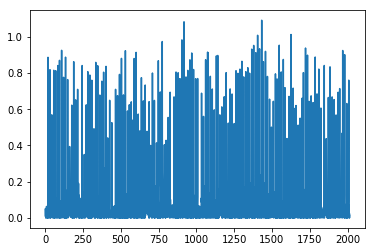

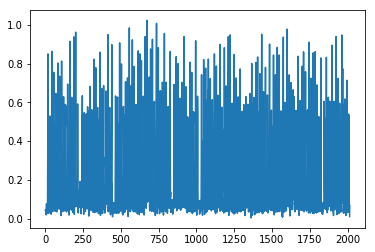

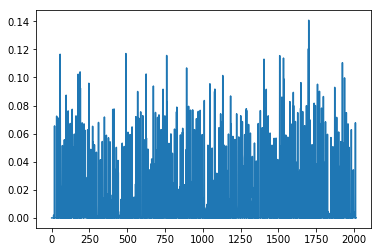

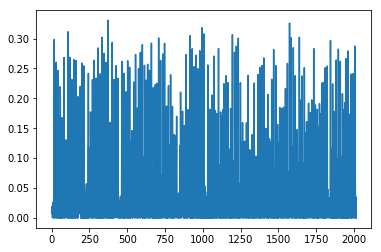

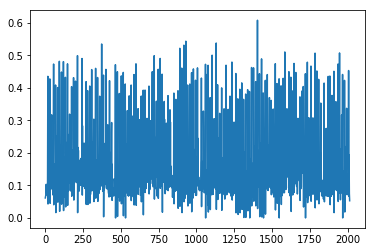

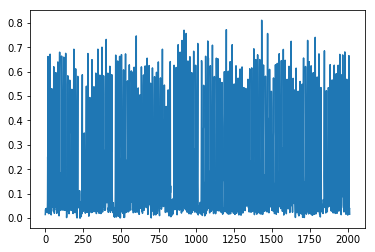

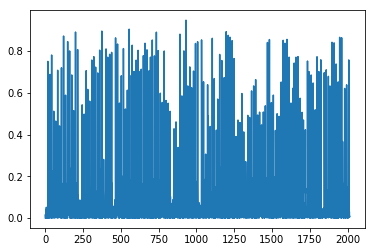

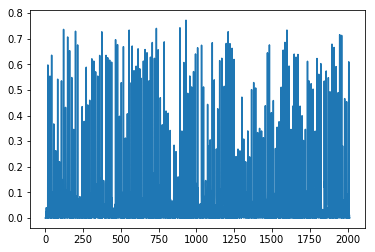

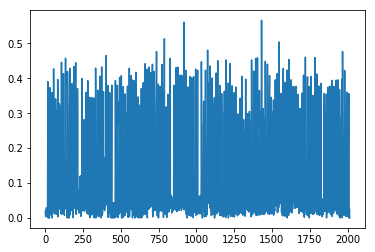

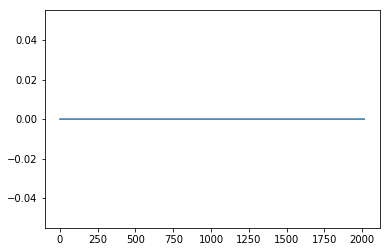

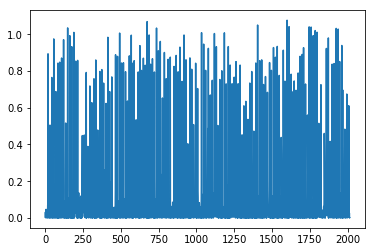

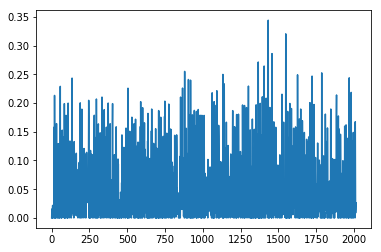

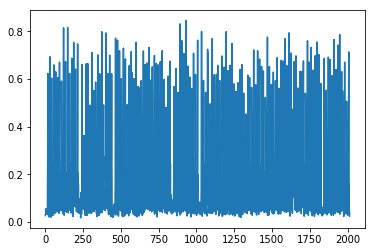

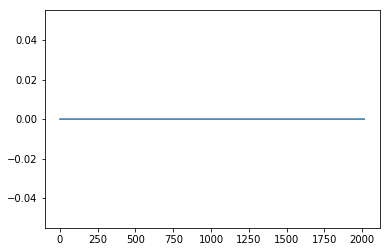

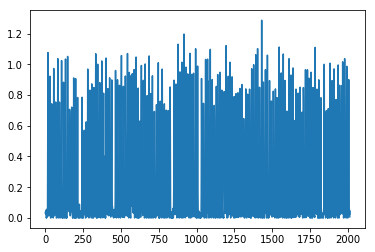

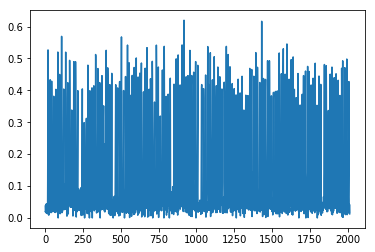

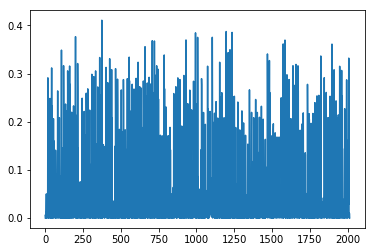

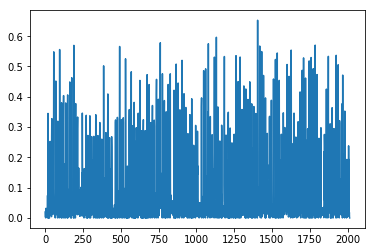

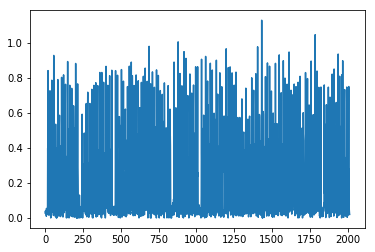

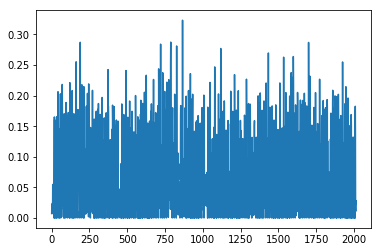

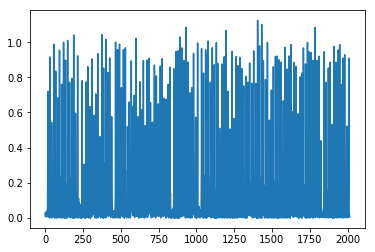

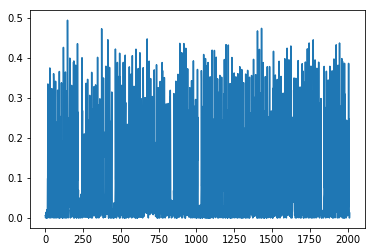

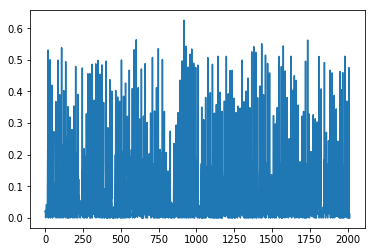

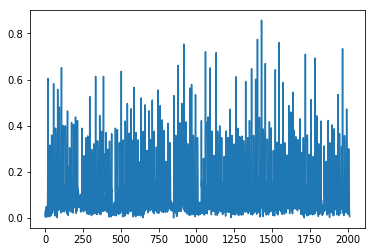

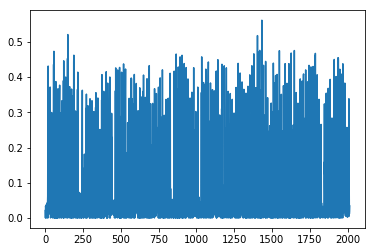

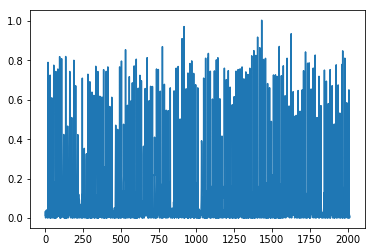

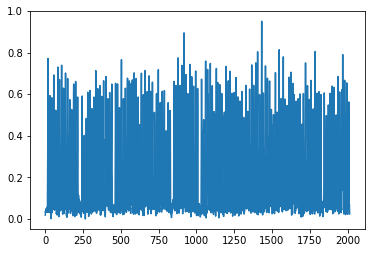

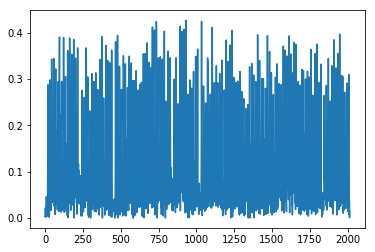

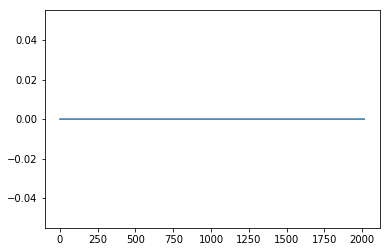

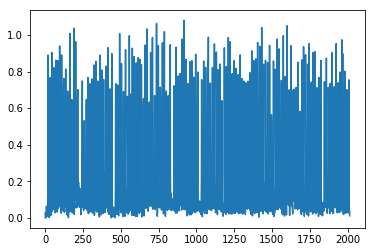

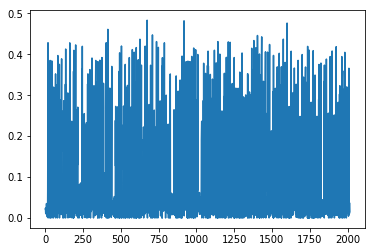

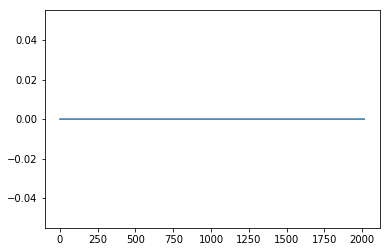

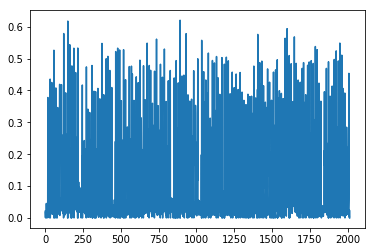

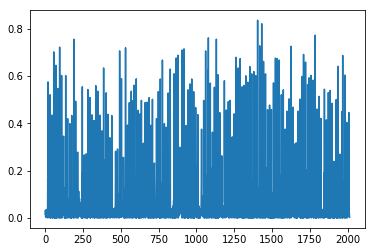

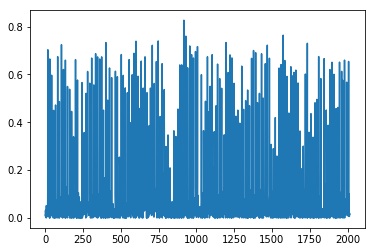

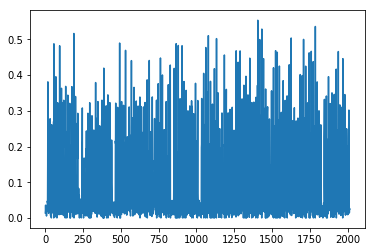

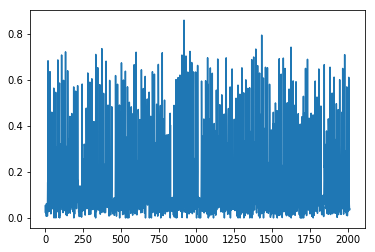

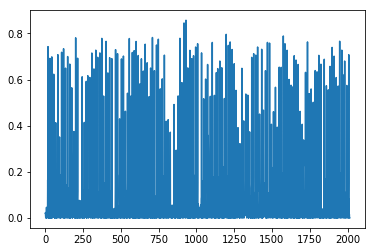

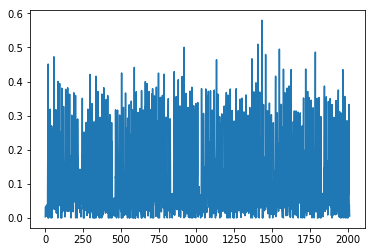

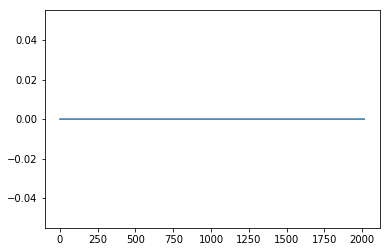

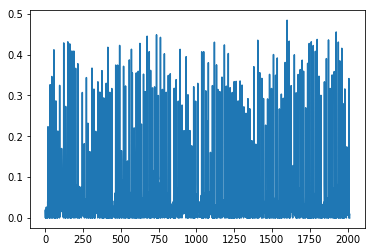

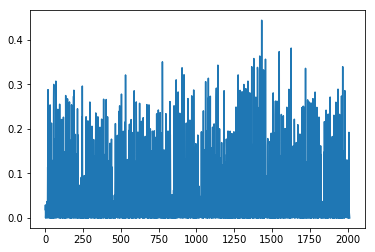

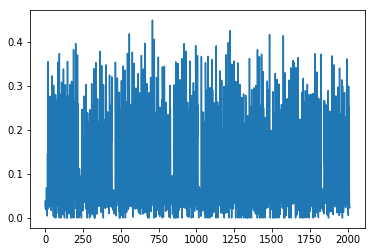

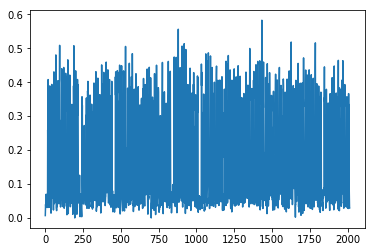

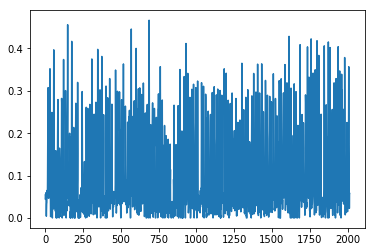

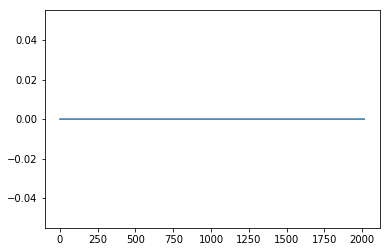

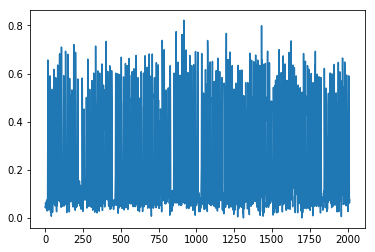

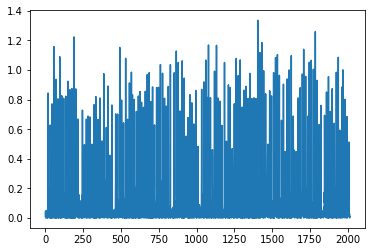

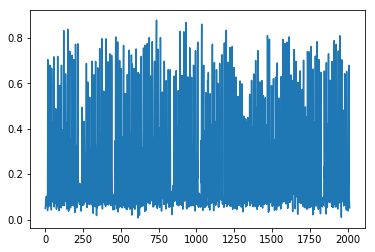

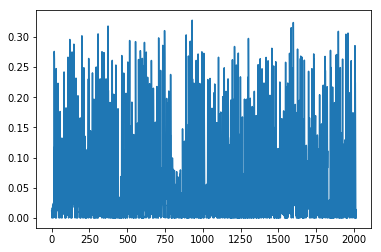

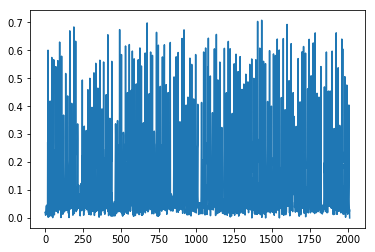

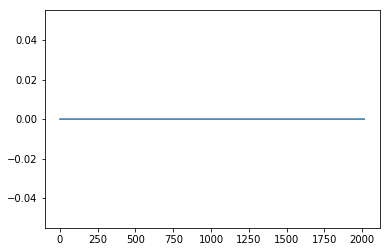

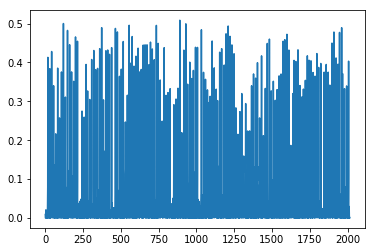

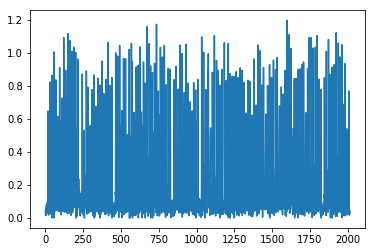

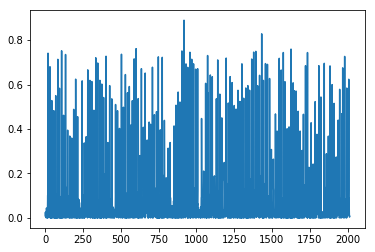

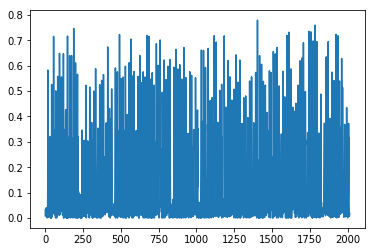

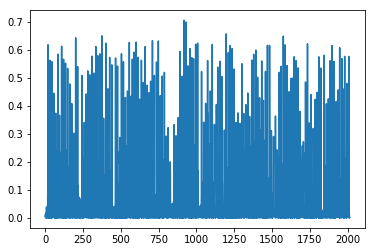

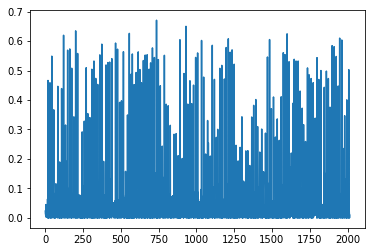

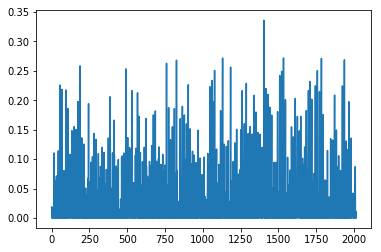

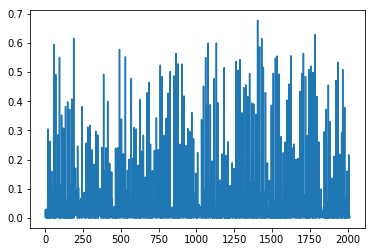

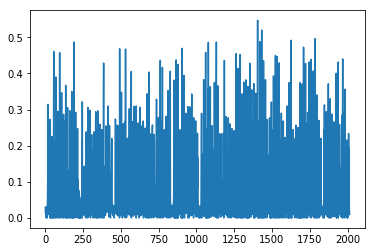

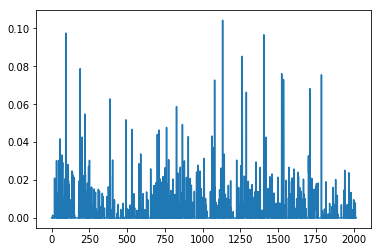

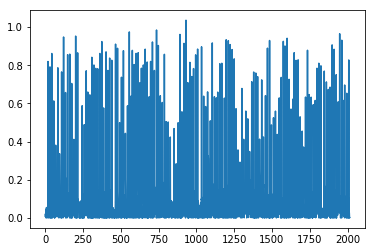

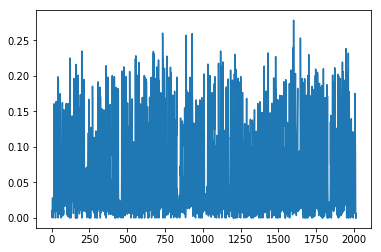

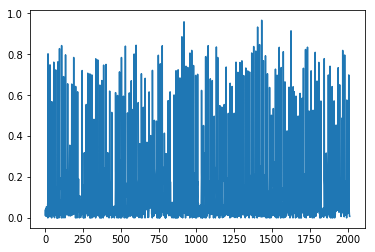

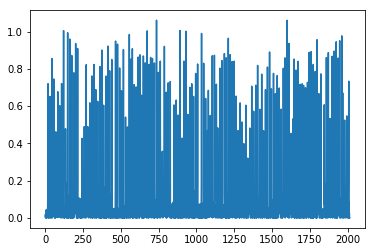

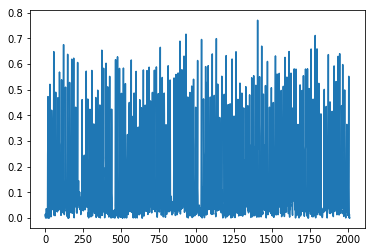

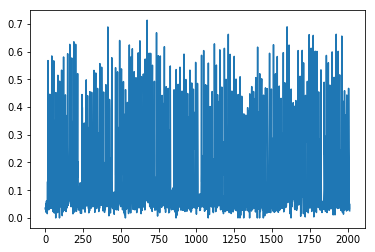

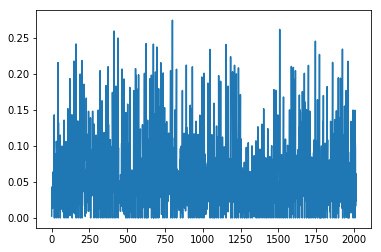

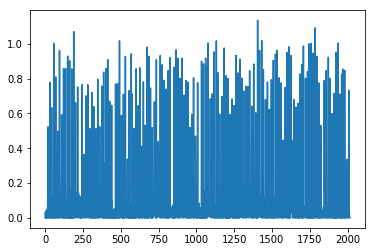

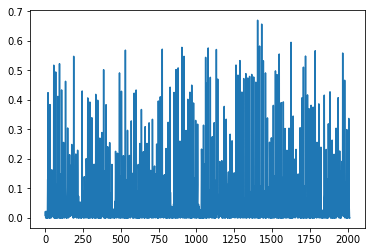

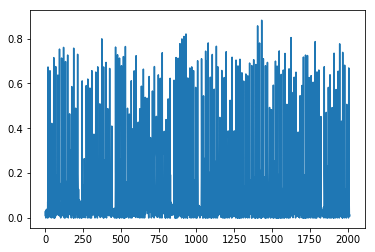

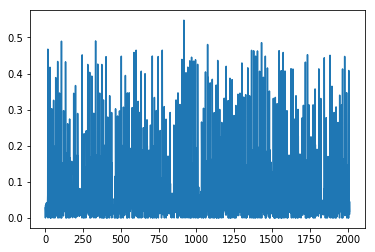

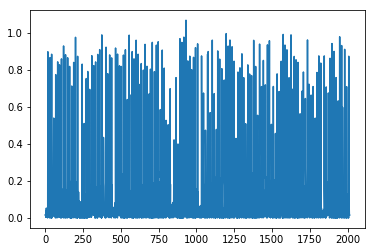

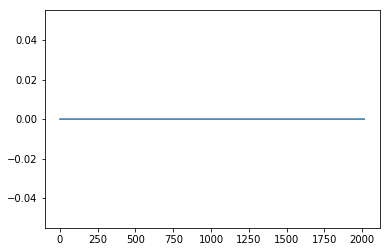

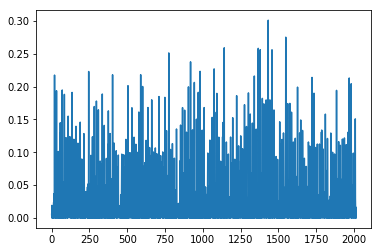

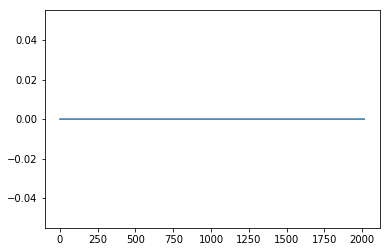

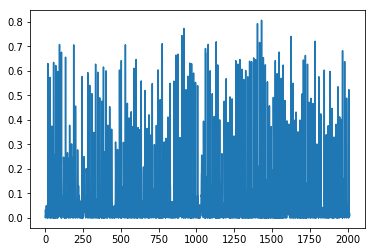

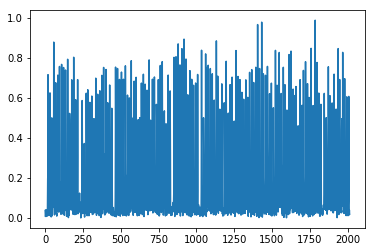

De 128 filtros, se utilizan 115 en promedio


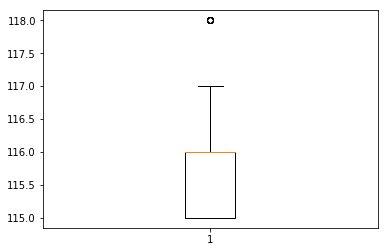

In [28]:
##light encoder?
lc_encoder = encoder_model.get_layer("model_1")
lc_encoder.summary()

X_lc_encoder  = lc_encoder.predict(X_lc_scaled[:N], batch_size=512)

n_s = 0
plt.plot(X_lc_scaled[n_s])
plt.show()

for i in range(X_lc_encoder.shape[-1]):
    plt.plot(X_lc_encoder[n_s][:,i])
    plt.show()
    
usados = []
for n in range(N):
    aux = 0
    for i in range(X_lc_encoder.shape[-1]):
        if np.sum(X_lc_encoder[n][:,i]) > 0:
            aux +=1
    usados.append(aux)
print("De %d filtros, se utilizan %d en promedio"%(X_lc_encoder.shape[-1],np.mean(usados)))
plt.boxplot(usados)
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64482, 1)          0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 64482, 8)          48        
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 64482, 8)          328       
_________________________________________________________________
average_pooling1d_6 (Average (None, 32241, 8)          0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 32241, 16)         656       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 32241, 16)         1296      
_________________________________________________________________
average_pooling1d_7 (Average (None, 16120, 16)         0         
__________

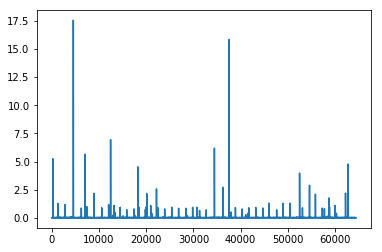

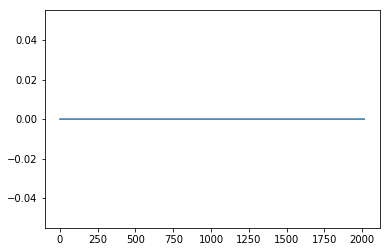

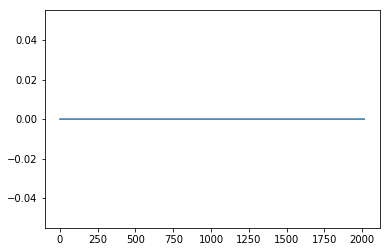

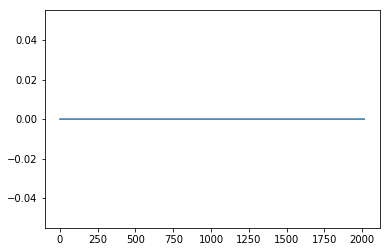

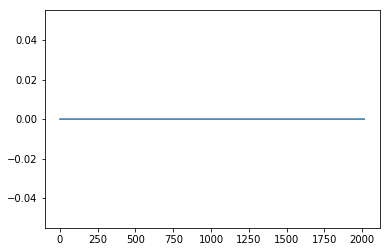

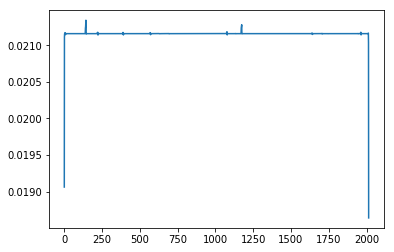

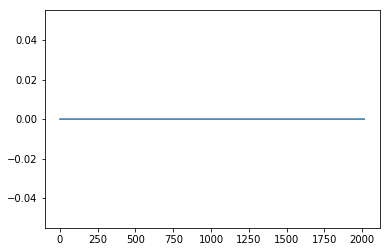

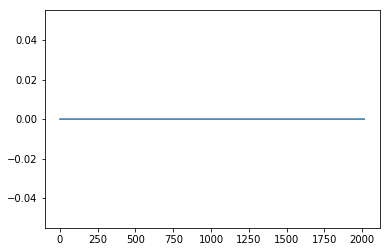

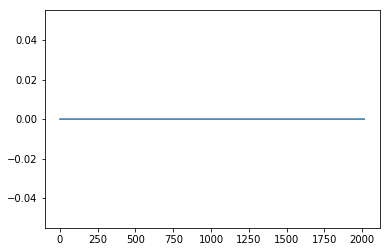

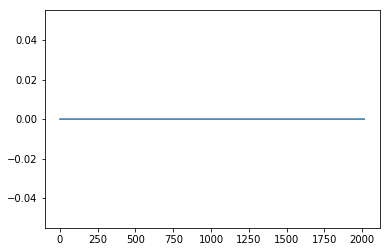

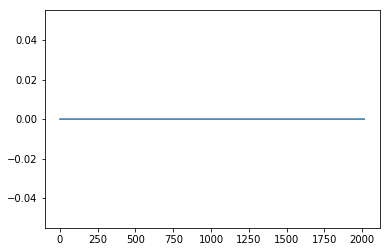

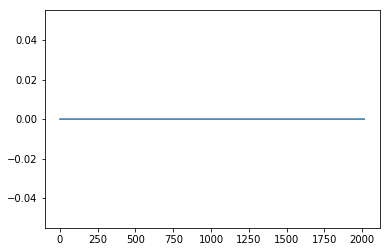

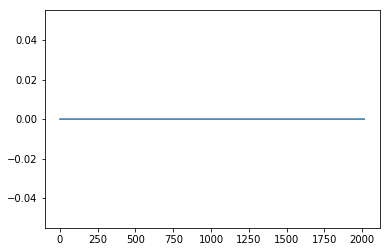

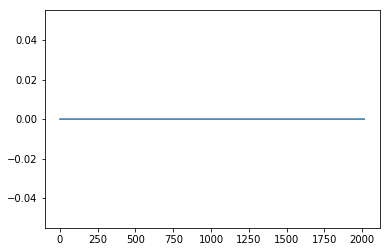

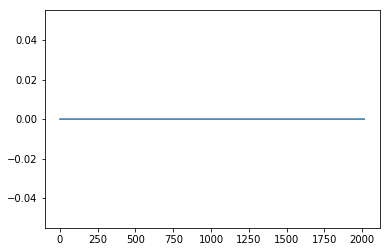

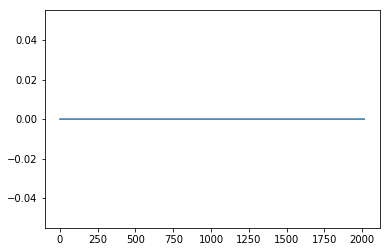

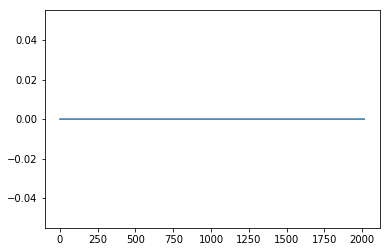

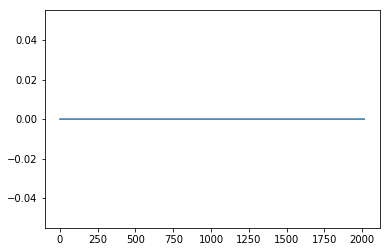

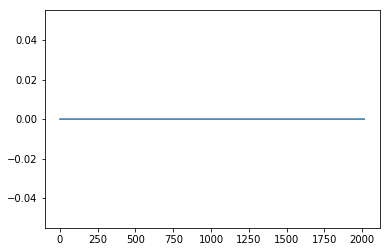

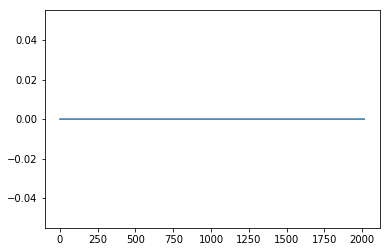

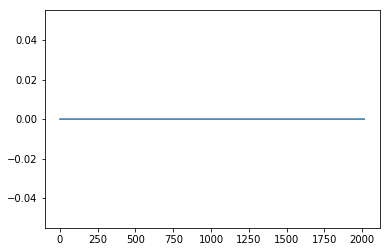

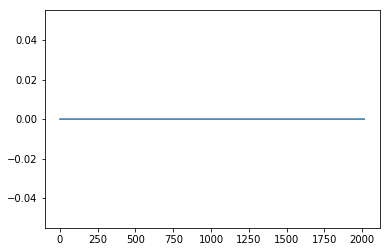

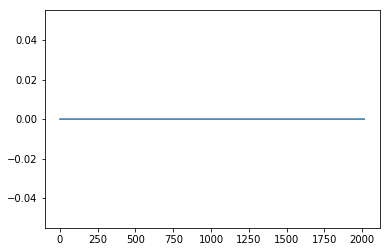

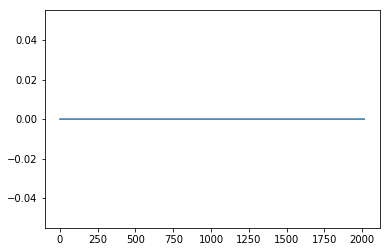

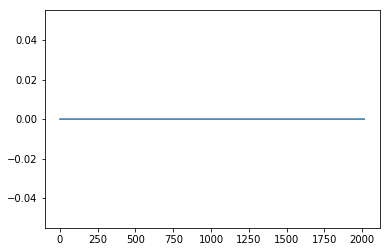

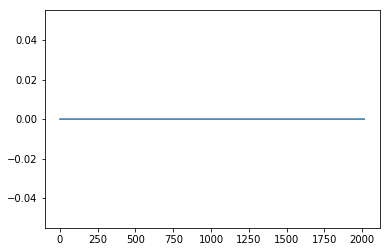

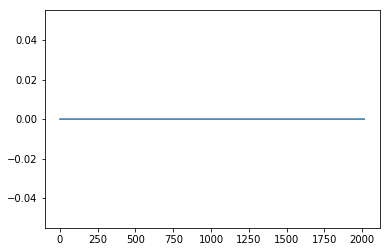

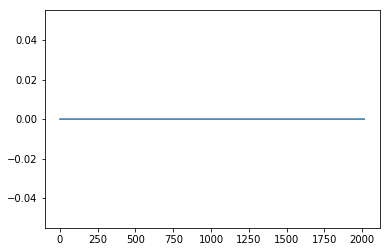

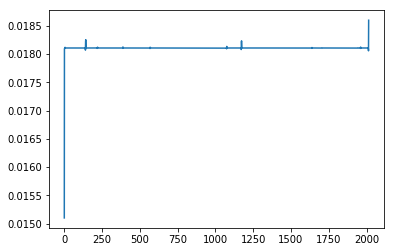

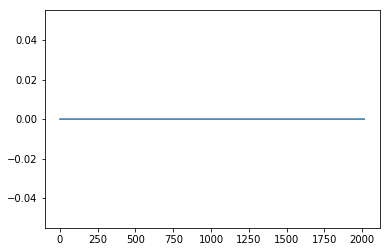

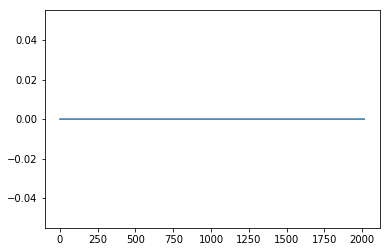

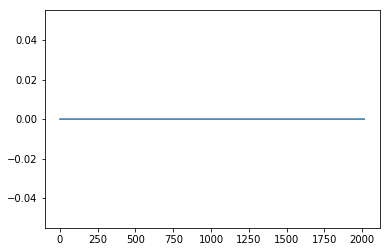

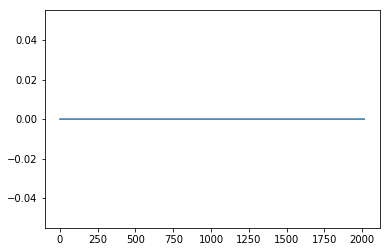

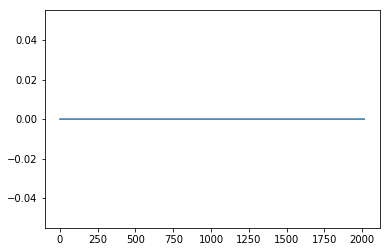

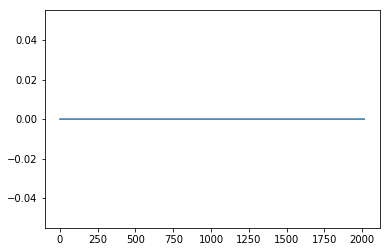

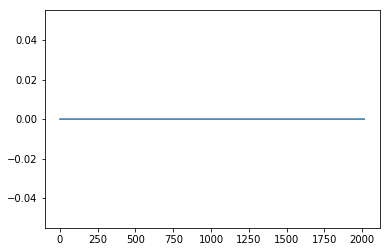

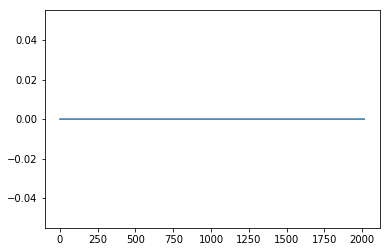

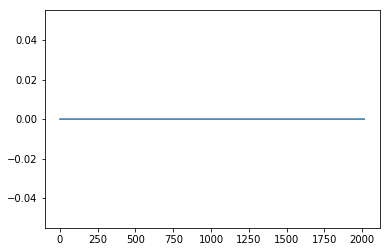

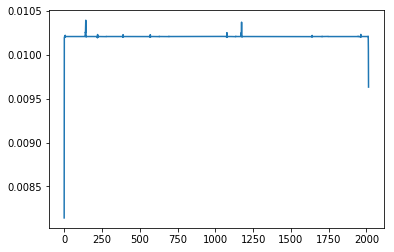

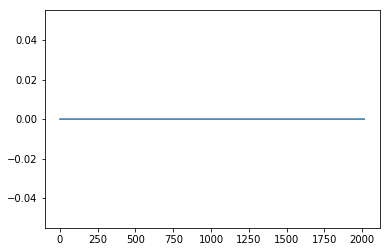

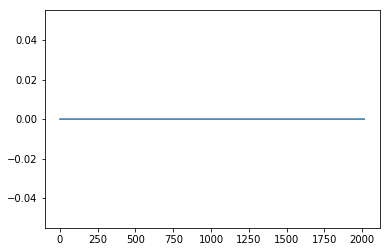

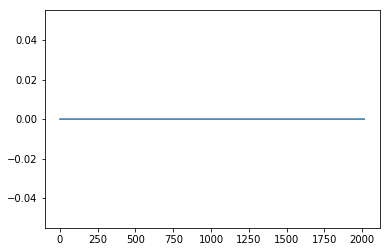

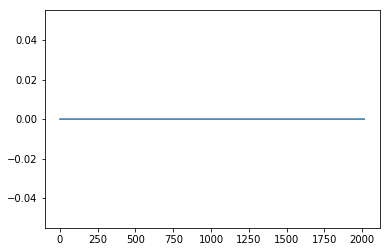

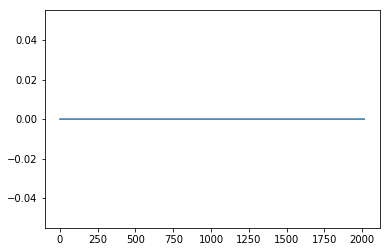

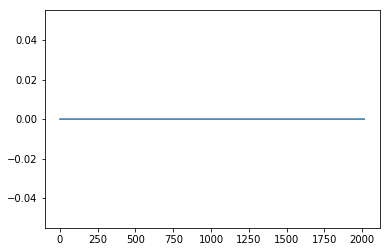

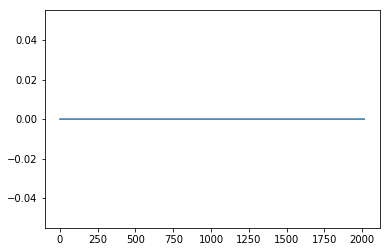

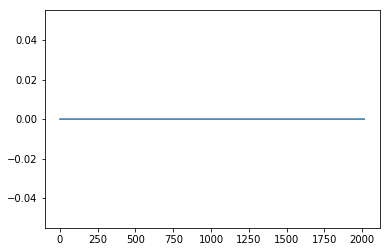

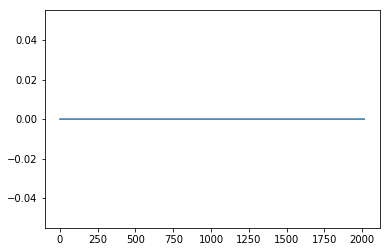

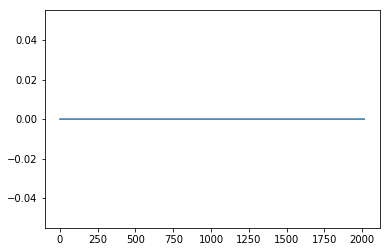

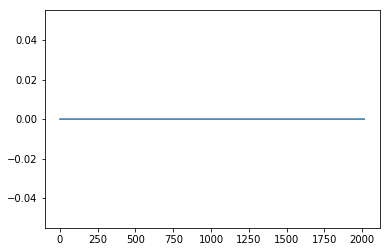

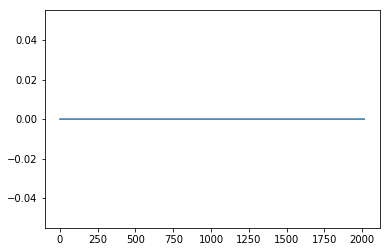

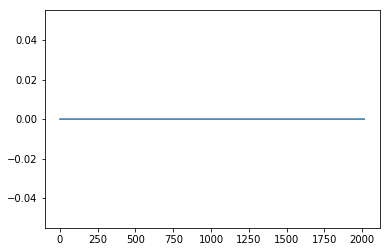

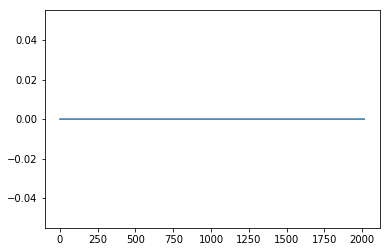

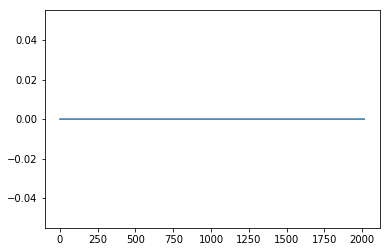

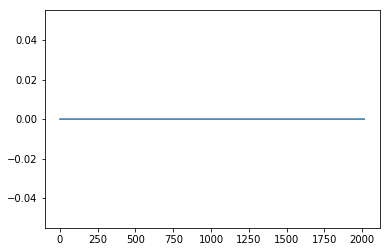

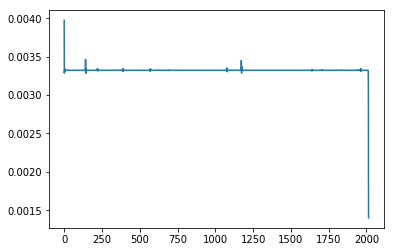

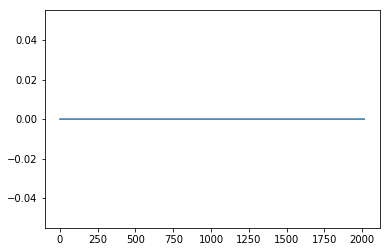

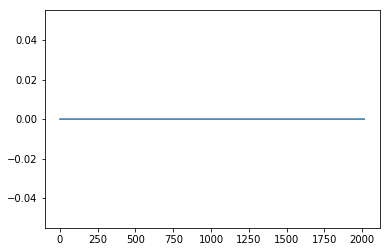

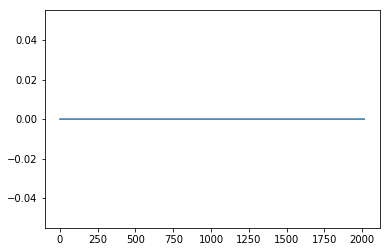

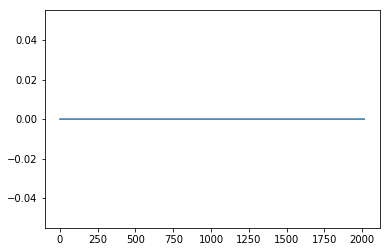

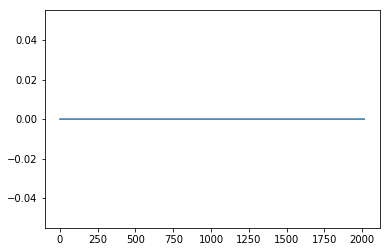

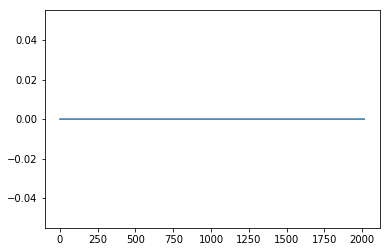

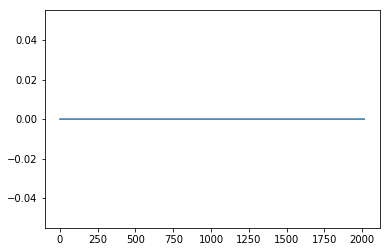

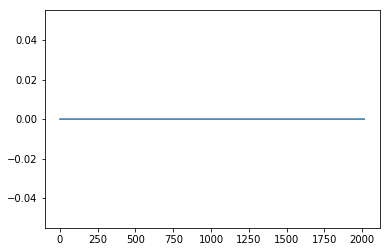

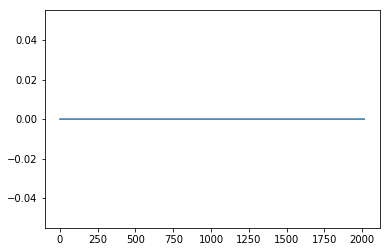

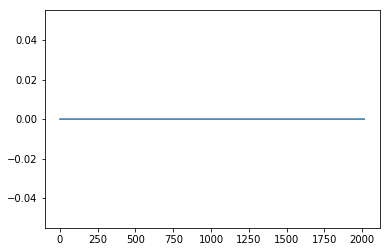

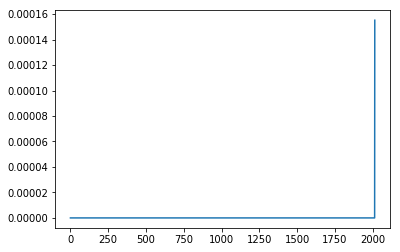

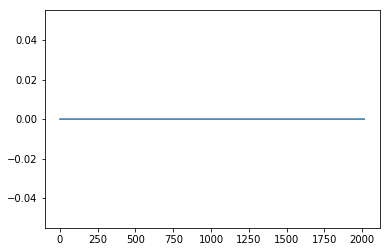

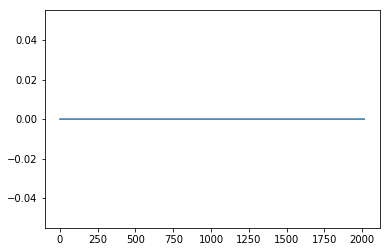

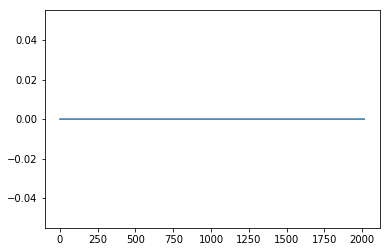

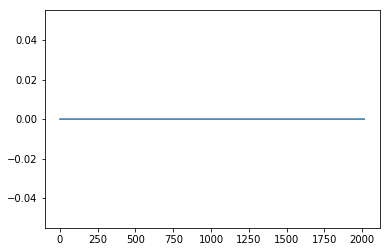

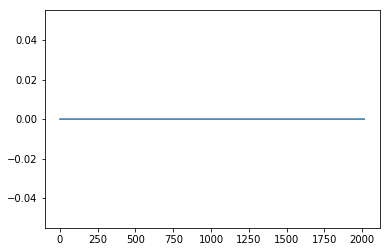

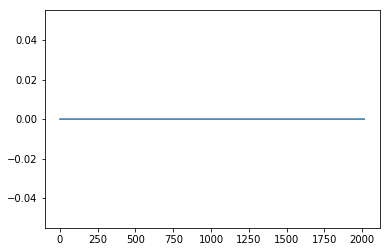

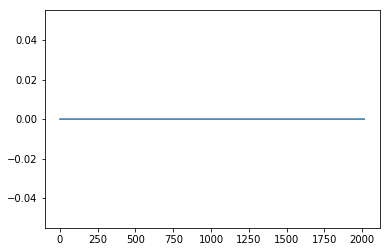

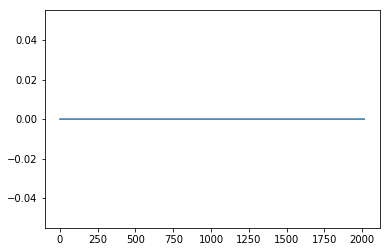

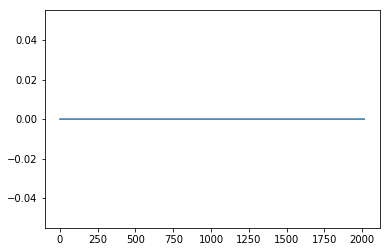

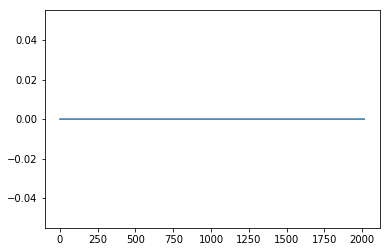

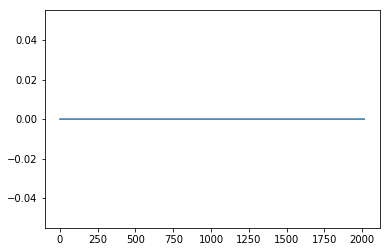

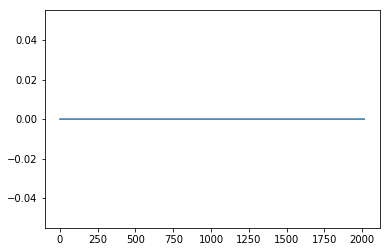

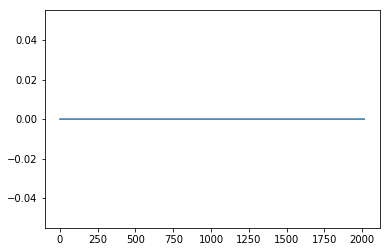

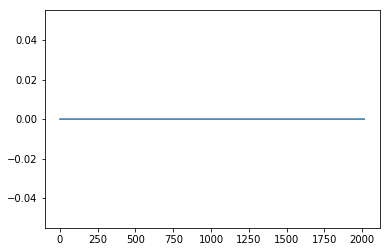

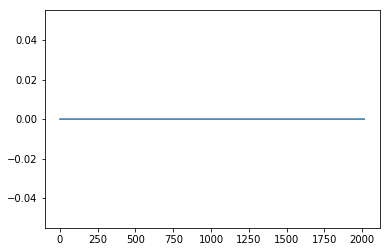

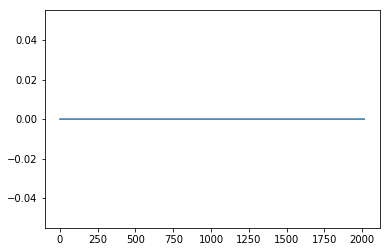

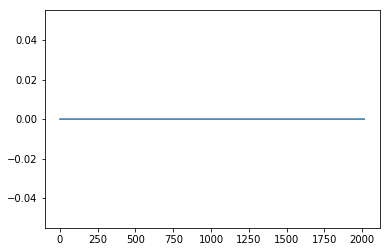

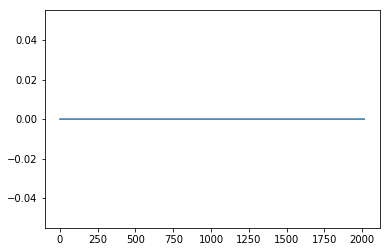

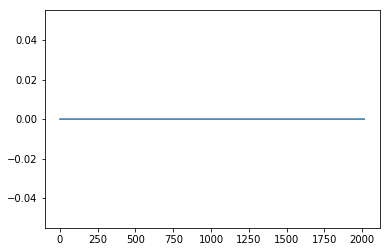

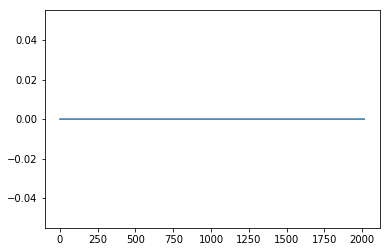

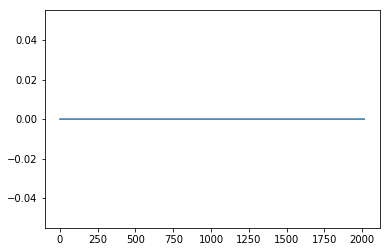

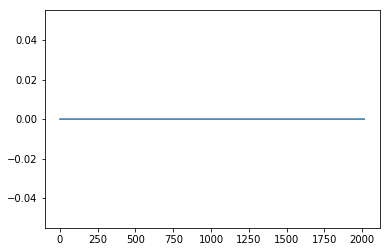

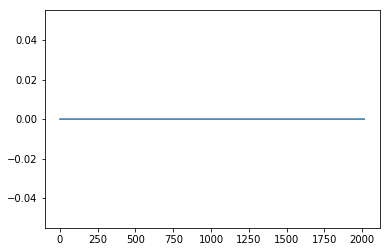

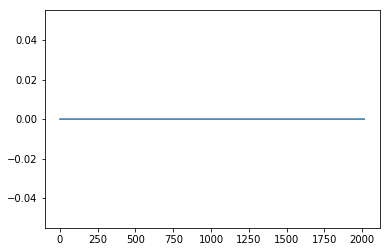

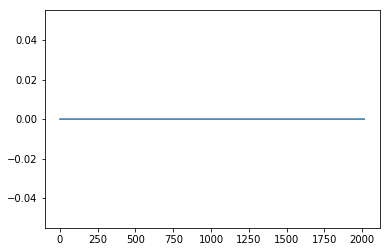

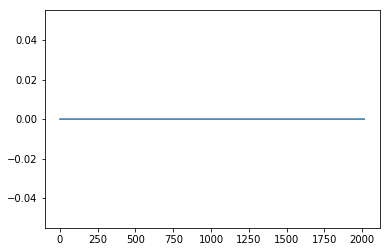

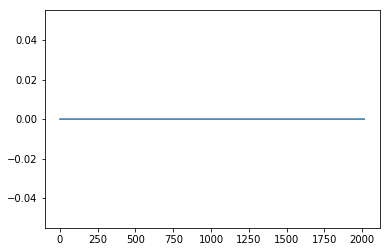

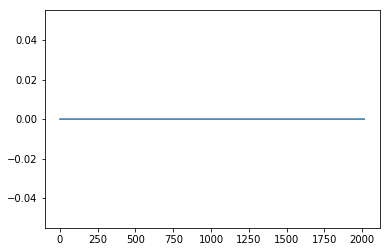

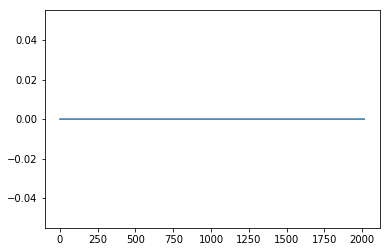

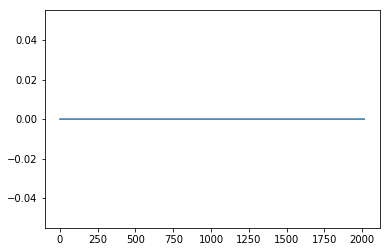

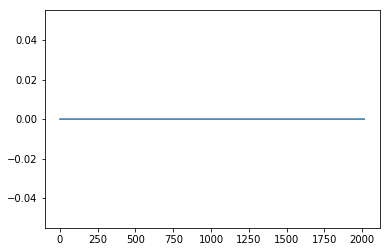

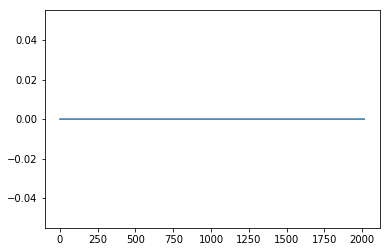

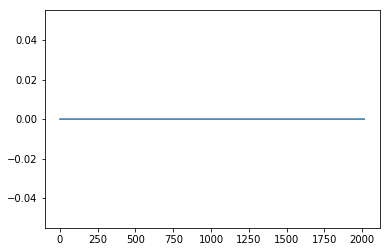

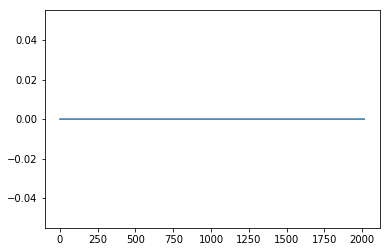

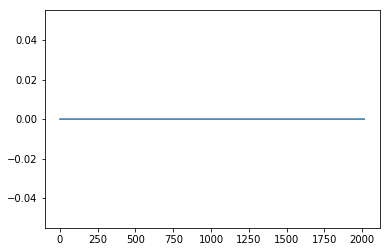

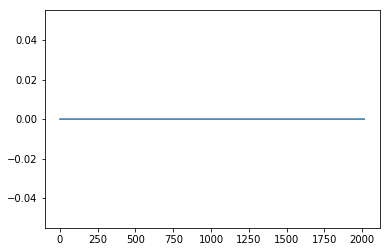

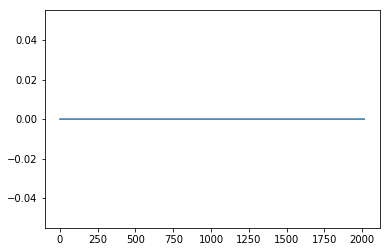

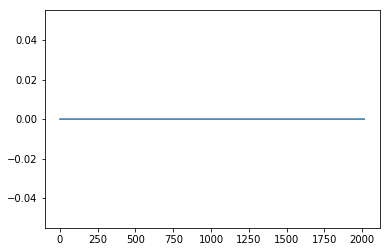

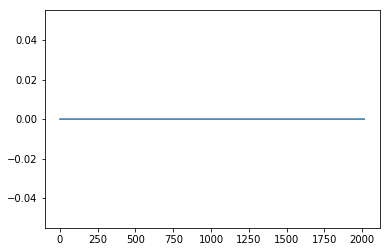

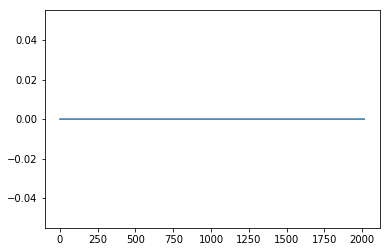

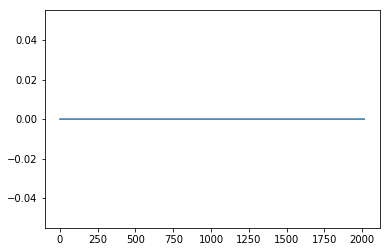

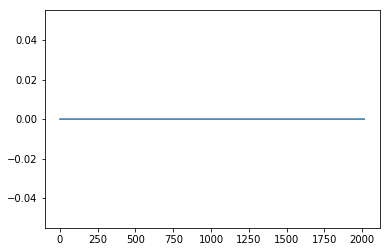

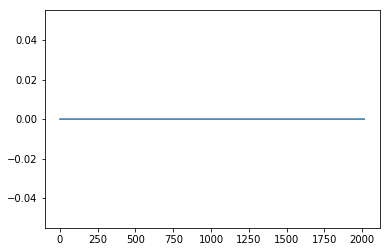

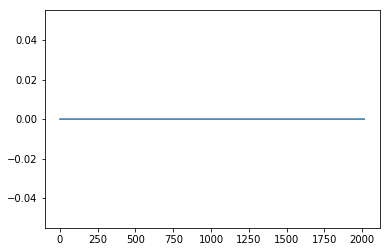

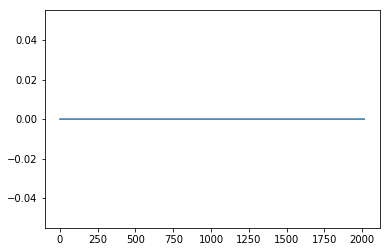

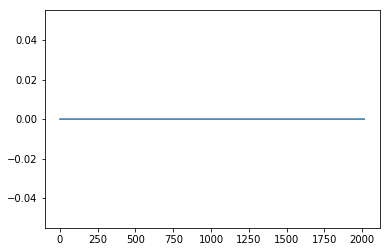

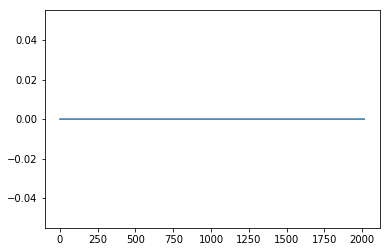

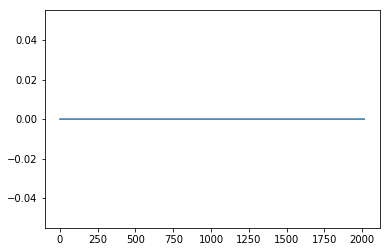

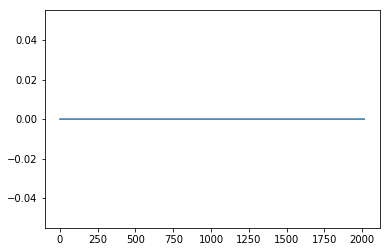

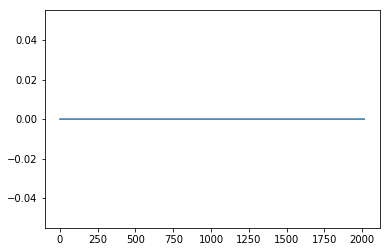

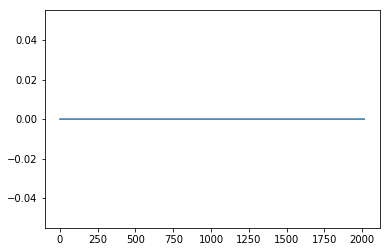

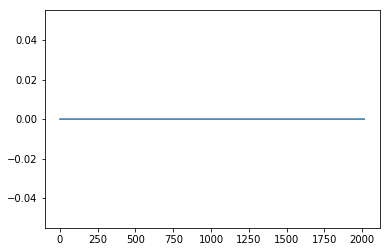

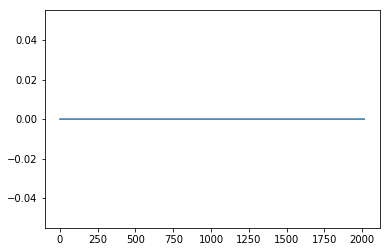

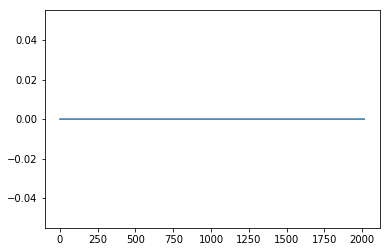

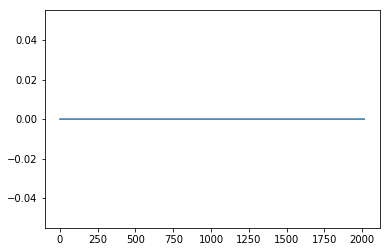

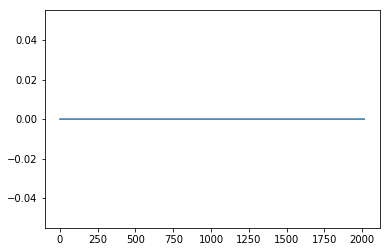

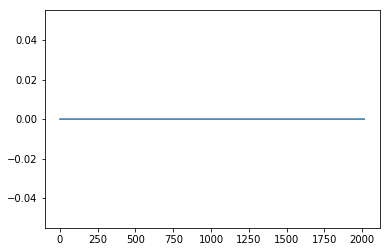

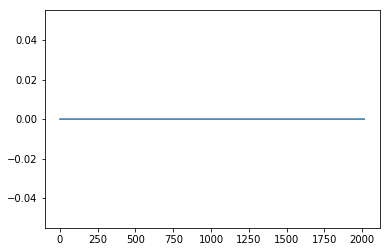

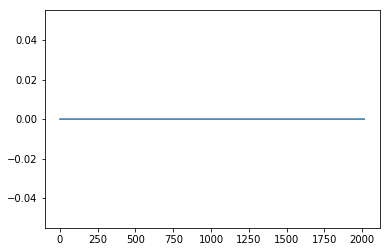

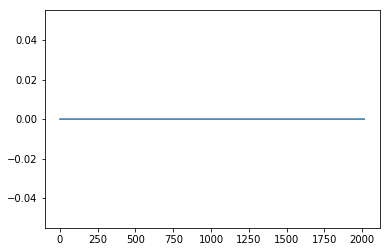

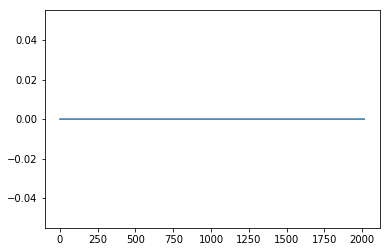

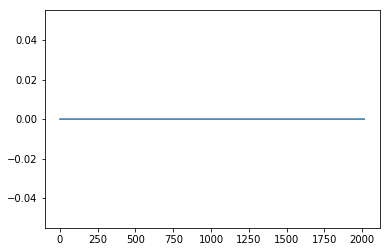

De 128 filtros, se utilizan 5 en promedio


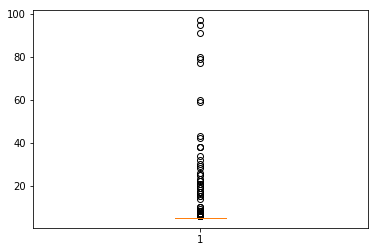

In [29]:
#time encoded..
time_encoder = encoder_model.get_layer("model_2")
time_encoder.summary()

X_time_encoder  = time_encoder.predict(X_time[:N], batch_size=512)

n_s = 0
plt.plot(X_time[n_s])
plt.show()

for i in range(X_time_encoder.shape[-1]):
    plt.plot(X_time_encoder[n_s][:,i])
    plt.show()
    
usados = []
for n in range(N):
    aux = 0
    for i in range(X_time_encoder.shape[-1]):
        if np.sum(X_time_encoder[n][:,i]) > 0:
            aux +=1
    usados.append(aux)
print("De %d filtros, se utilizan %d en promedio"%(X_time_encoder.shape[-1],np.mean(usados)))
plt.boxplot(usados)
plt.show() ### reducir los filtros de tiempo..

In [18]:
#encode light curves...
X_lc_scaled_real = X_lc_scaled[:N] 
X_lc_scaled_aug  = X_lc_scaled[N:] 
X_time_real = X_time[:N] 
X_time_aug  = X_time[N:] 

#X_enc_lc_real  = encoder_model.predict(np.concatenate([X_lc_scaled_real,X_time_real],axis=2), batch_size=512)
#X_enc_lc_aug  = encoder_model.predict(np.concatenate([X_lc_scaled_aug,X_time_aug],axis=2), batch_size=512)

X_enc_lc_real  = encoder_model.predict([X_lc_scaled_real,X_time_real], batch_size=512)
X_enc_lc_aug  = encoder_model.predict([X_lc_scaled_aug,X_time_aug], batch_size=512)
X_enc_lc_real.shape

(2281, 2015, 128)

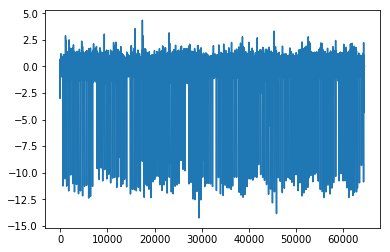

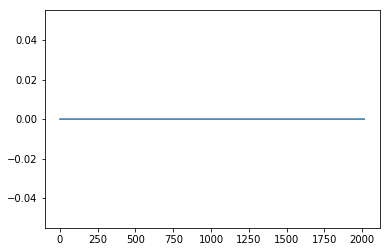

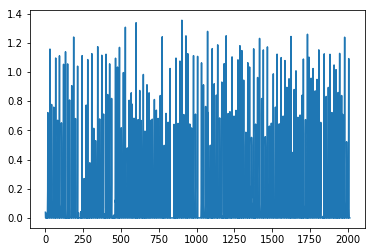

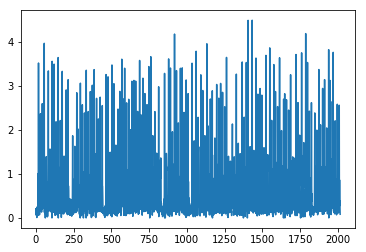

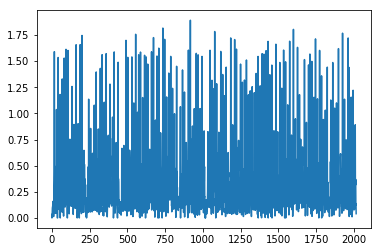

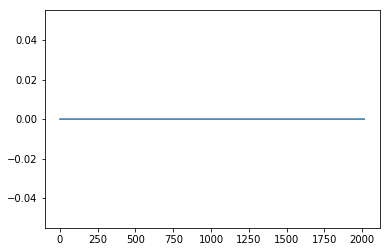

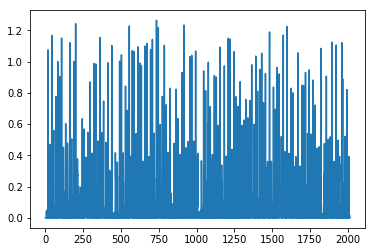

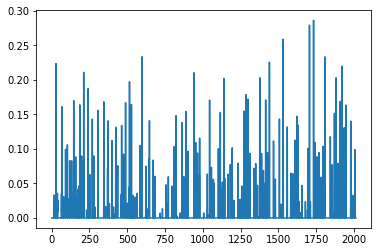

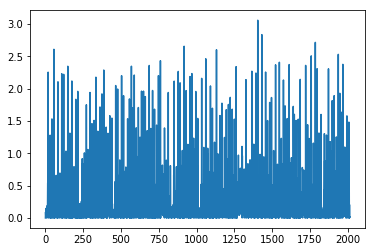

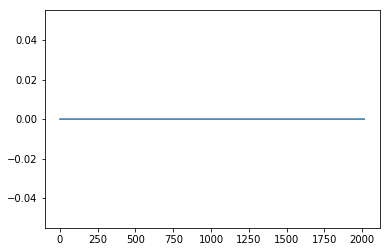

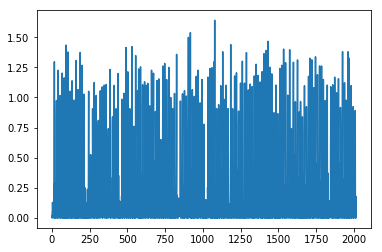

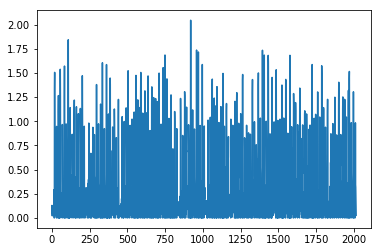

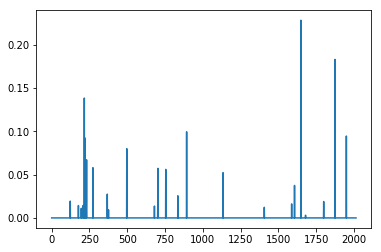

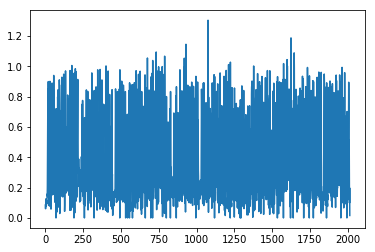

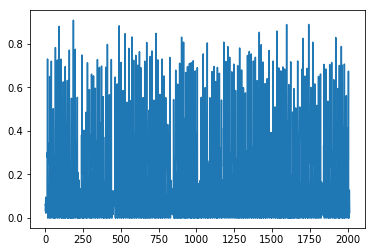

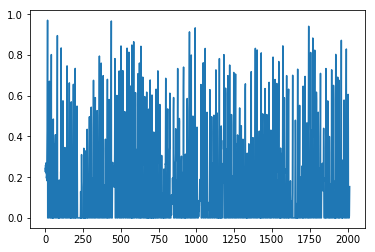

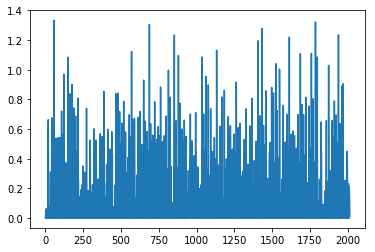

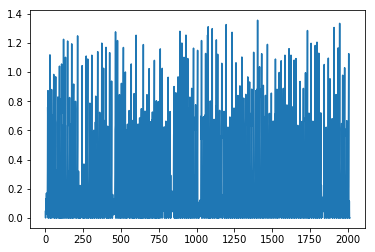

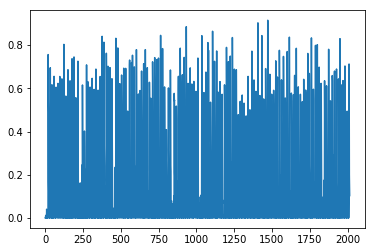

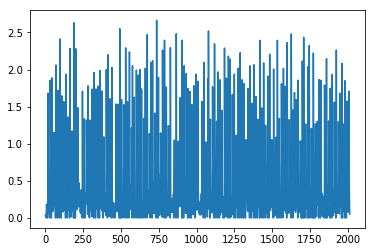

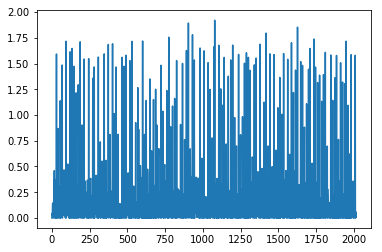

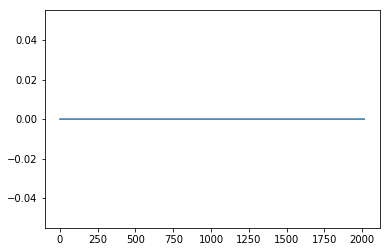

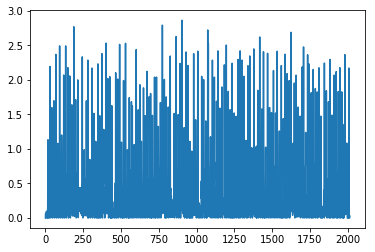

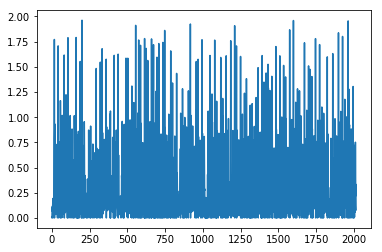

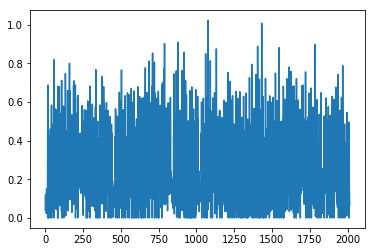

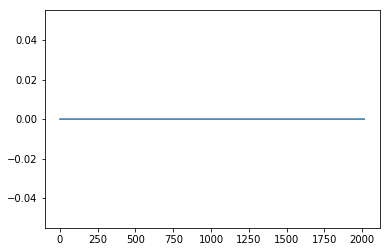

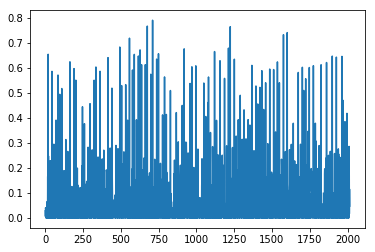

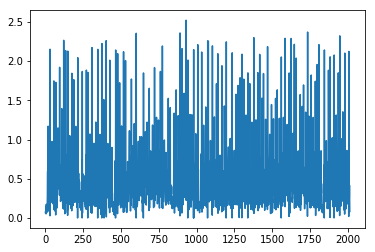

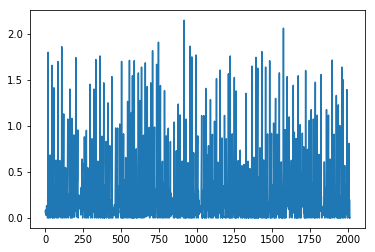

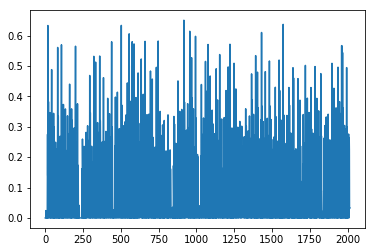

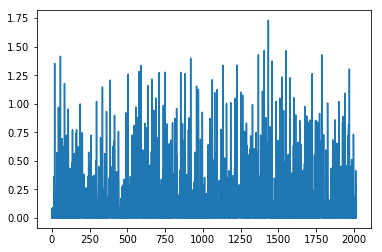

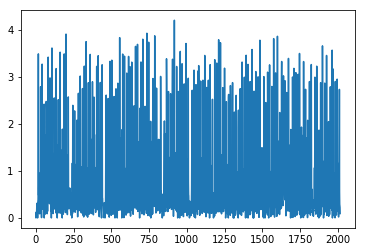

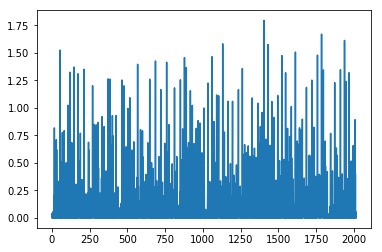

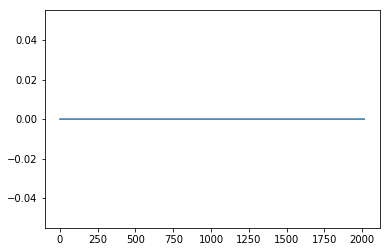

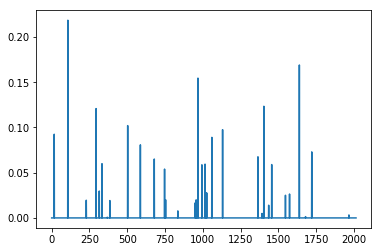

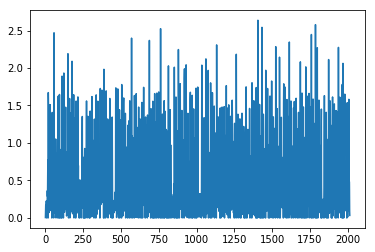

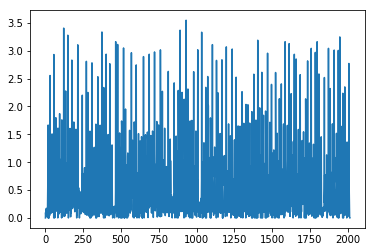

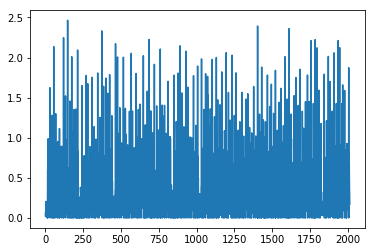

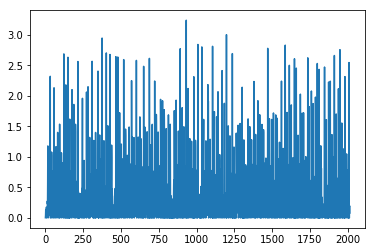

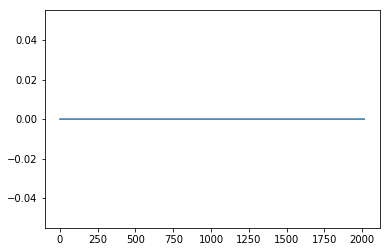

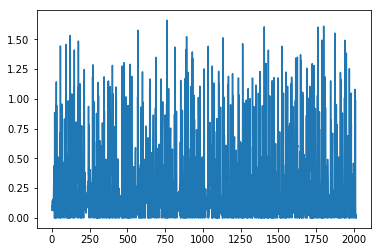

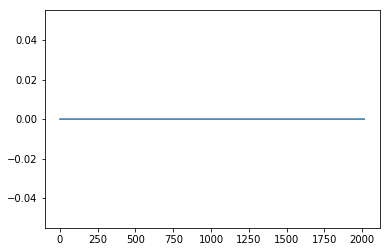

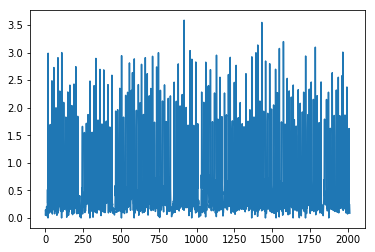

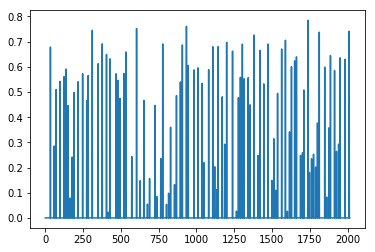

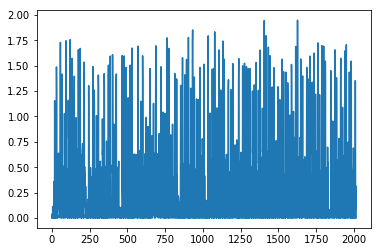

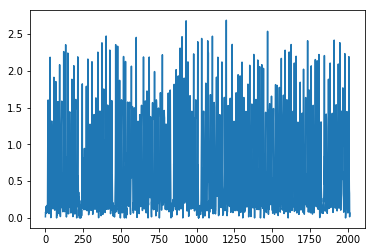

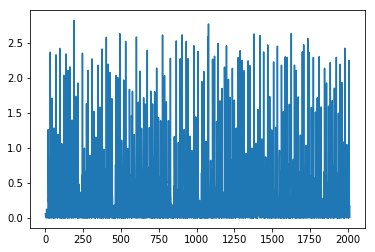

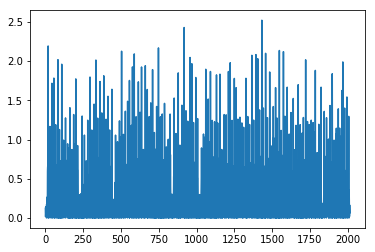

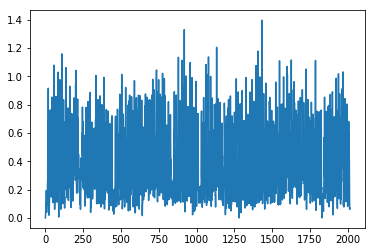

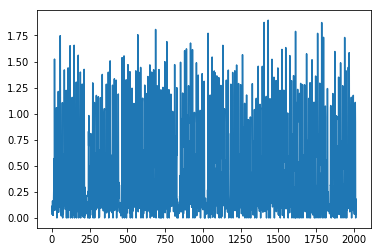

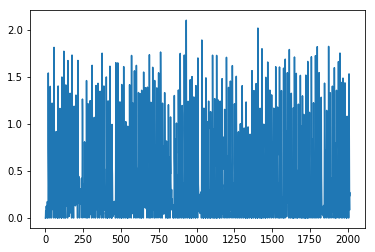

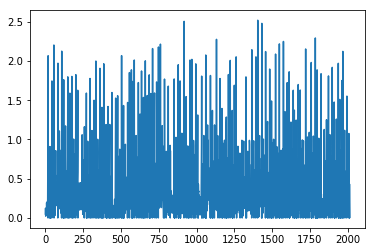

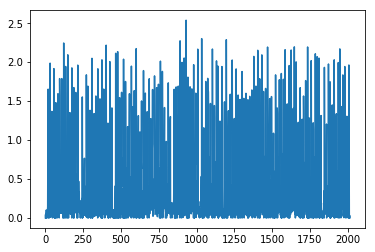

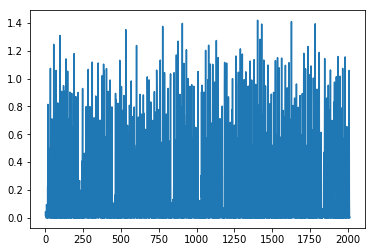

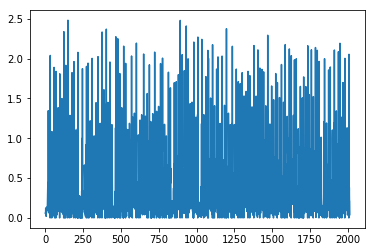

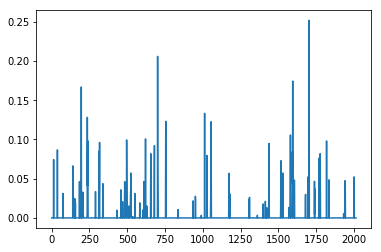

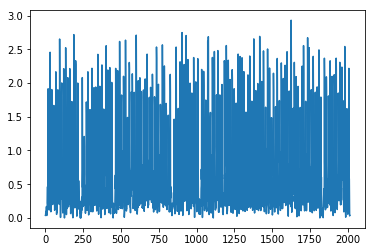

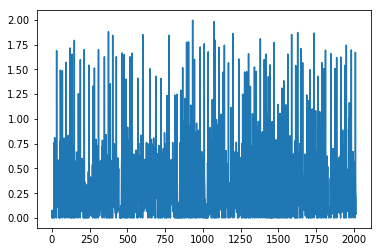

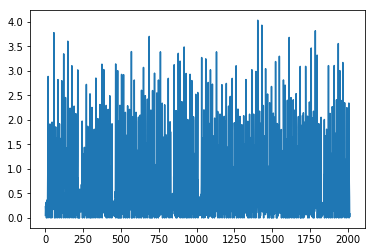

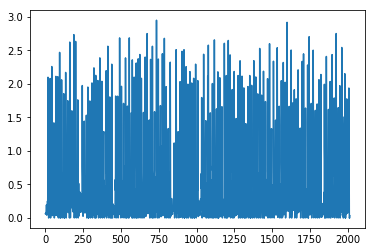

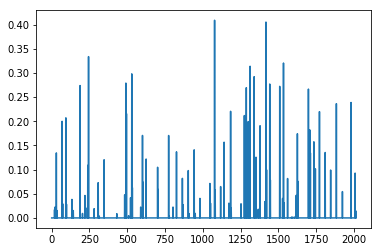

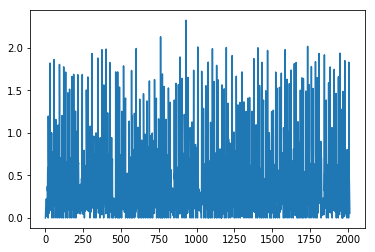

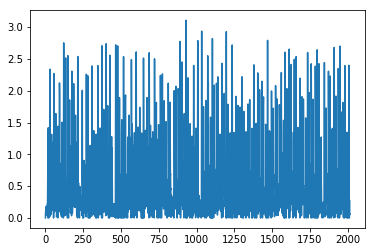

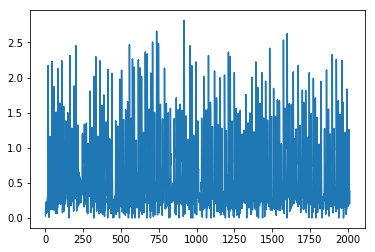

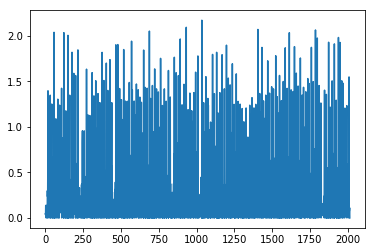

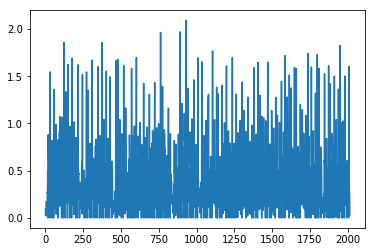

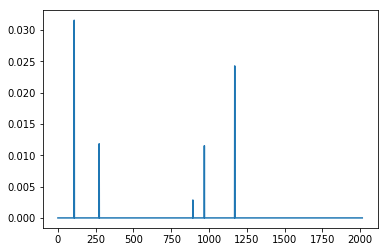

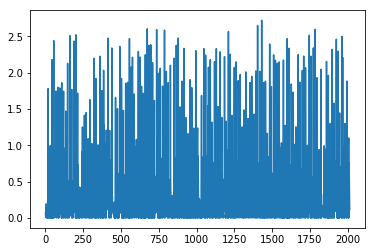

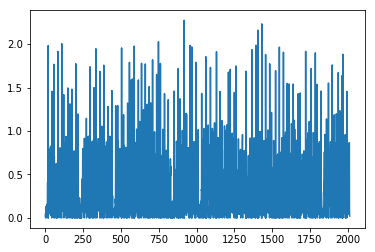

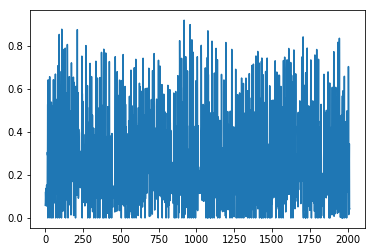

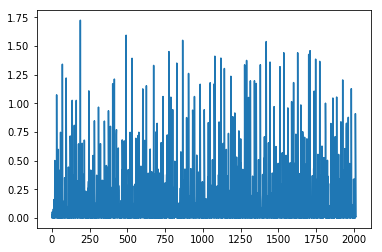

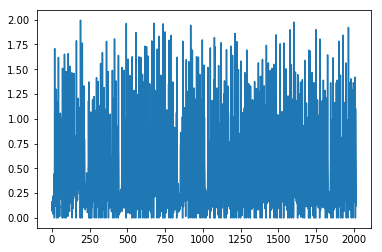

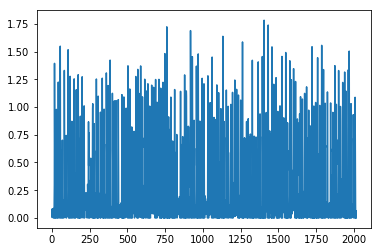

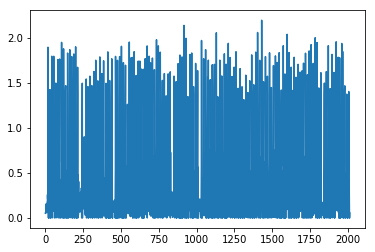

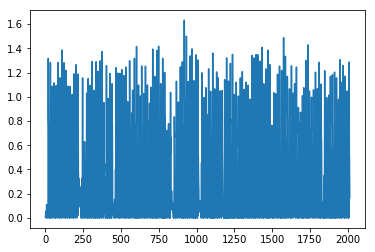

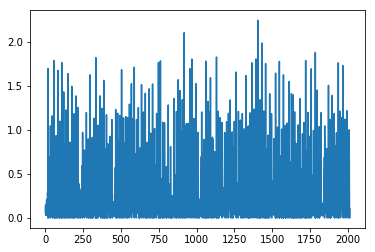

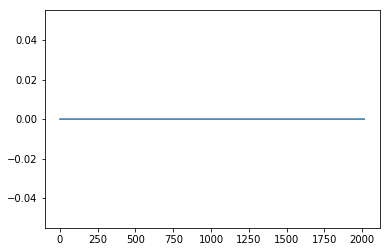

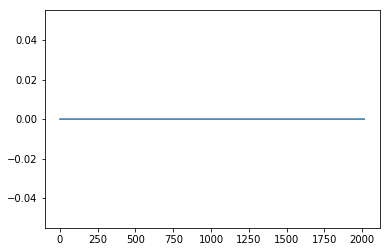

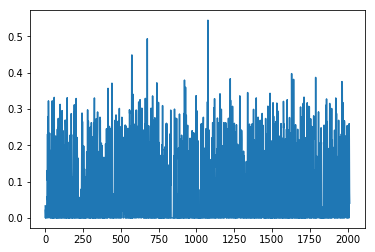

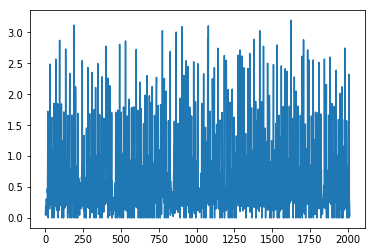

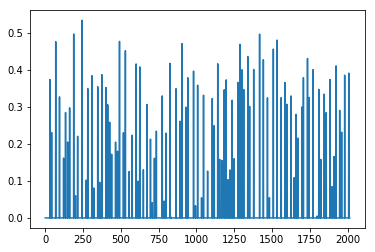

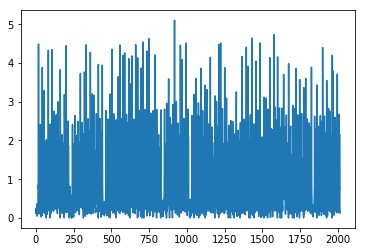

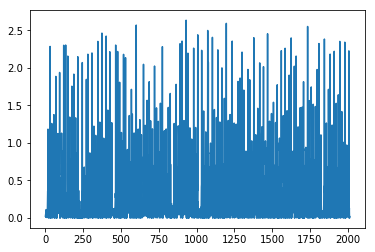

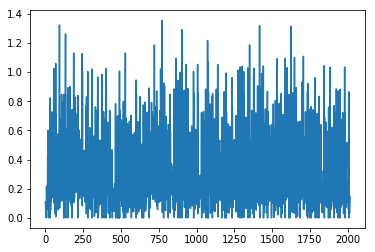

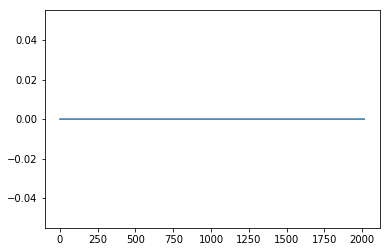

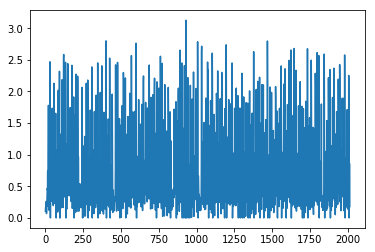

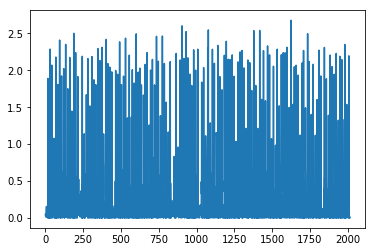

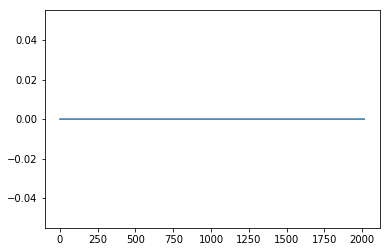

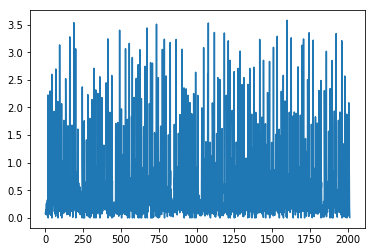

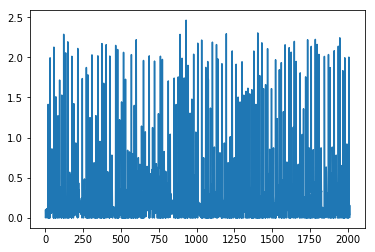

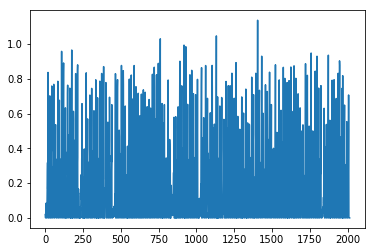

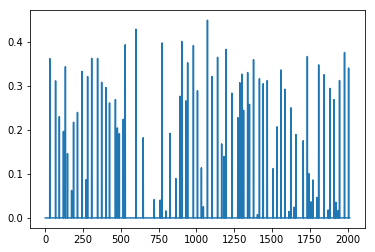

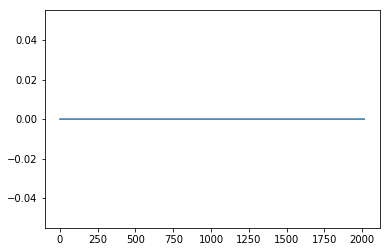

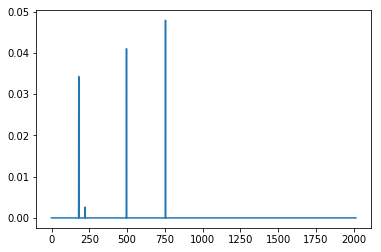

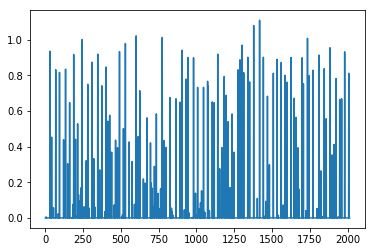

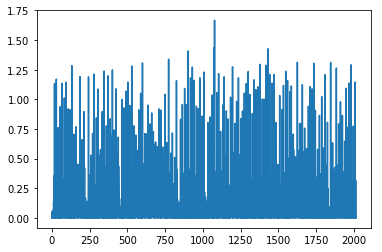

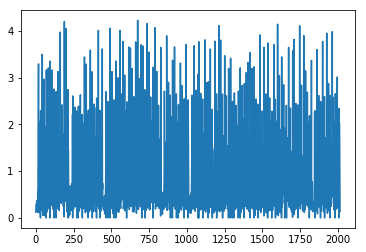

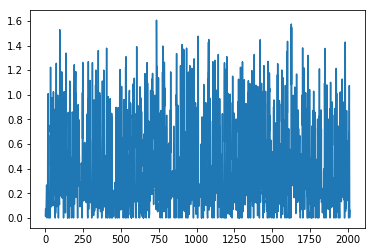

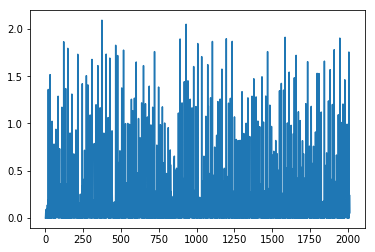

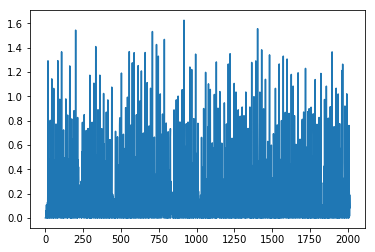

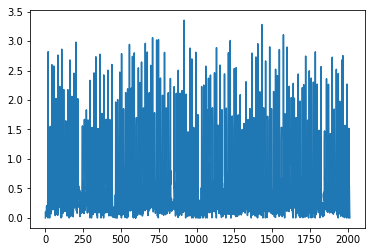

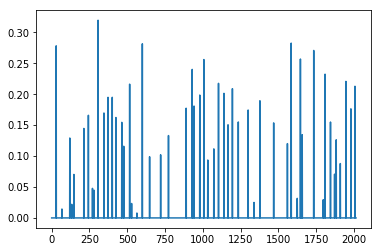

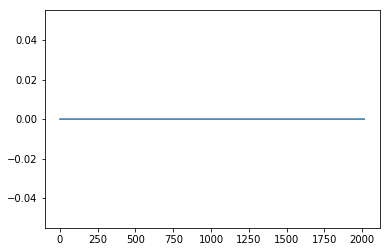

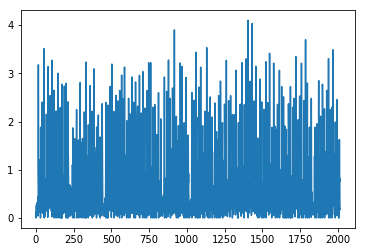

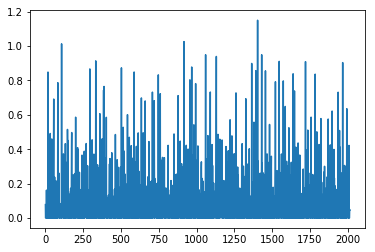

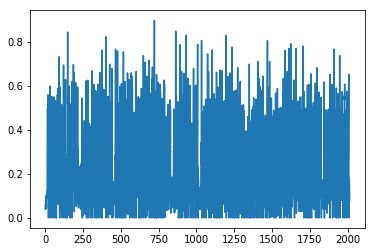

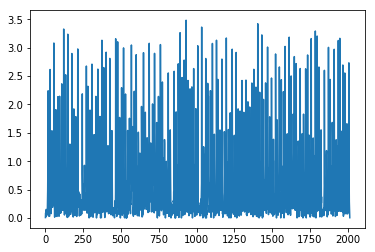

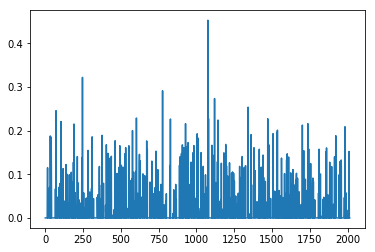

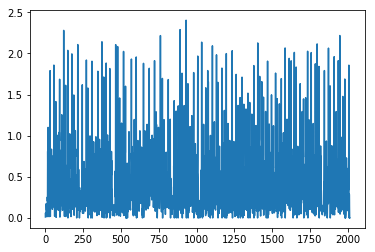

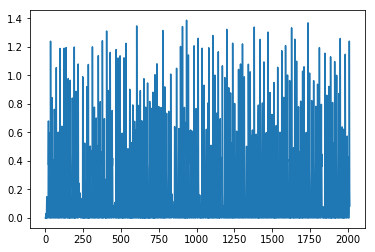

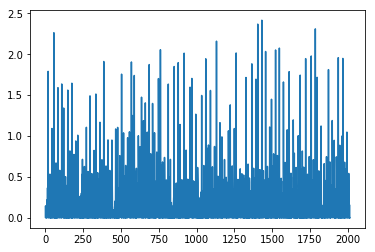

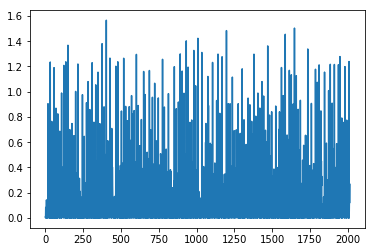

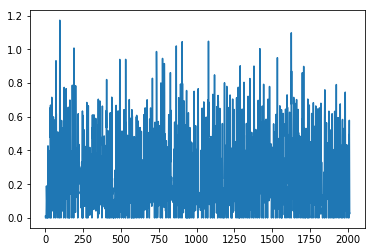

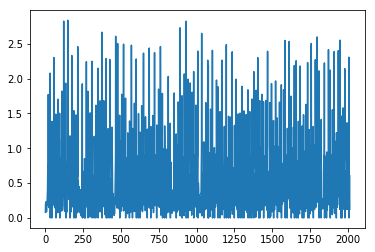

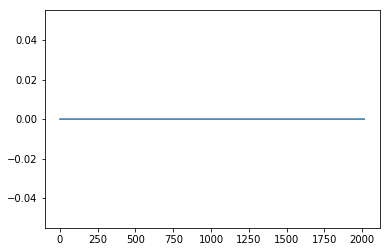

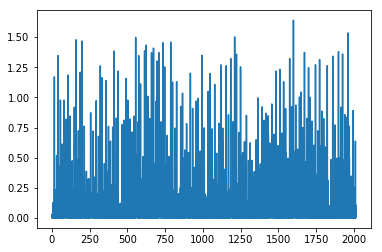

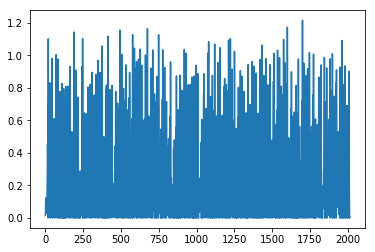

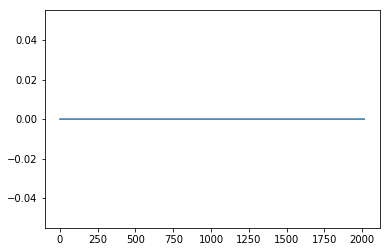

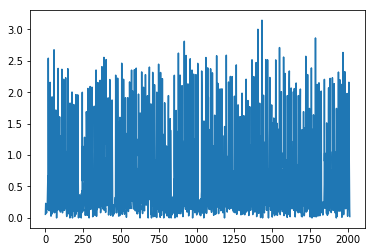

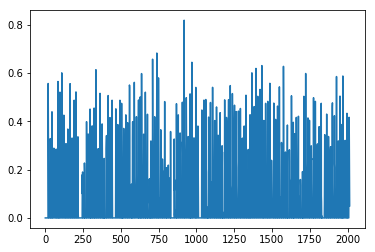

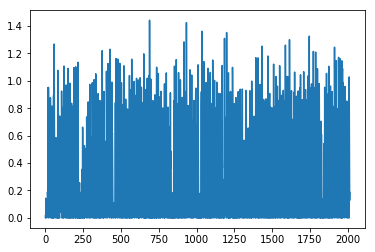

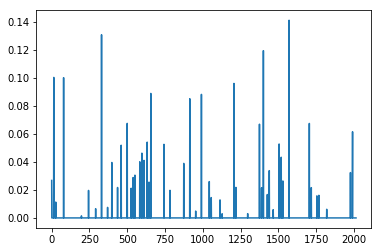

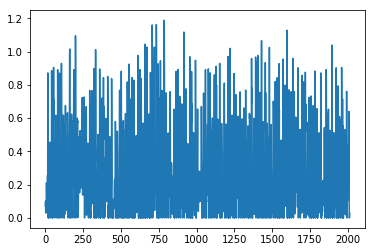

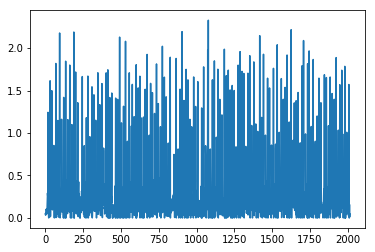

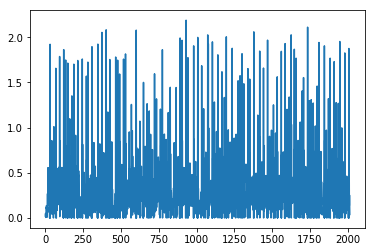

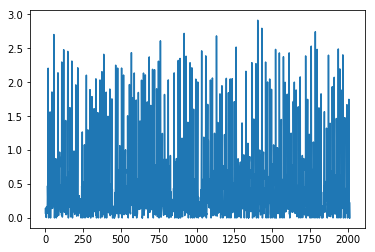

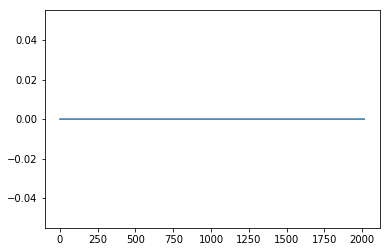

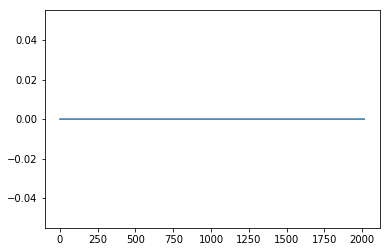

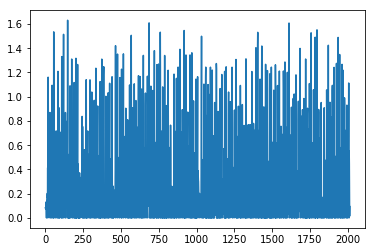

In [27]:
n_s = 0
plt.plot(X_lc_scaled_real[n_s])
plt.show()

for i in range(X_enc_lc_real.shape[-1]):
    plt.plot(X_enc_lc_real[n_s][:,i])
    plt.show()

In [19]:
X_train = np.concatenate([X_enc_lc_real[mask_train[mask_conf]], X_enc_lc_aug[mask_train[mask_conf]]], axis=0)
#X_train = np.concatenate([X_enc_lc_real[mask_train[:]], X_enc_lc_aug[mask_train[:]]], axis=0)

Ystd_train = np.tile(Ystd_train, (2,1))
#Ystd_train_err = np.tile(Ystd_train_err, (2,1))

X_test = X_enc_lc_real[mask_test[mask_conf]]
#X_test = X_enc_lc_real[mask_test_conf]

print("X train shape: ",X_train.shape)
print("X test shape: ",X_test.shape)
print("Y train shape: ",Ystd_train.shape)
print("Y test shape: ",Ystd_test.shape)

X train shape:  (3552, 2015, 128)
X test shape:  (505, 2015, 128)
Y train shape:  (3552, 1)
Y test shape:  (505, 1)


### Define Encoder-Metadata

In [20]:
import keras
from keras.models import Sequential
from keras.layers import *
import tensorflow as tf

def train_model(model,X,y,epochs=1,batch_size=32, val_split=0.0, verb=1):
    return model.fit(X,y, epochs=epochs, batch_size=batch_size, validation_split=val_split, verbose=verb)

#autoencoder.compile(loss=[mse_masked],optimizer='adam')
#autoencoder.compile(loss=[titled_loss(0.1)],optimizer='adam') #0.05

In [21]:
class KMaxPooling(keras.engine.Layer):
    """
    K-max pooling layer that extracts the k-highest activations from a sequence (2nd dimension). TensorFlow backend.
    """
    def __init__(self, k=1, **kwargs):
        super().__init__(**kwargs)
        self.input_spec = keras.engine.InputSpec(ndim=3)
        self.k = k

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.k, input_shape[2])

    def call(self, inputs):
        # swap last two dimensions since top_k will be applied along the last dimension
        shifted_input = tf.transpose(inputs, [0, 2, 1]) 
        # extract top_k, returns two tensors [values, indices]
        top_k = tf.nn.top_k(shifted_input, k=self.k, sorted=True, name=None)[0] 
        return tf.transpose(top_k, [0, 2, 1])

import math
def K_l(L,seq_len,k_top,layer=1): #dinamyc k-max
    return max(k_top, math.ceil( seq_len*(L-layer)/L) )

def add_conv_bloq(model, filters, kernel_s, BN=False, drop=0,padding='same',dil_r=1):
    model.add(Conv1D(filters, kernel_s, strides=1, padding=padding, activation='relu',dilation_rate=dil_r))
    if BN:
        model.add(BatchNormalization())
    if dil_r == 1:
        model.add(Conv1D(filters, kernel_s, strides=1, padding=padding, activation='relu',dilation_rate=dil_r))
        if BN:
            model.add(BatchNormalization())
    if drop != 0:
        model.add(Dropout(drop))

#build model functions..
def build_simple_model(inp_shape,out_shape, units, L =1, drop=0):
    model = Sequential()
    model.add(GlobalAveragePooling1D(input_shape=inp_shape))
    for l in range(L):
        model.add(Dense(units, activation='relu'))
        units = int(units/2)
        if drop > 0.0:
            model.add(Dropout(drop))
    model.add(Dense(out_shape, activation='linear'))
    return model

def build_rnn_model(inp_shape, out_shape, units, layers=1, bid=False, gru=True, drop=0):
    #que achique las unidades?
    model = Sequential()
    model.add(InputLayer(input_shape=inp_shape))
    for i in range(layers):
        if gru:
            layer_rec = GRU(units, return_sequences=(i < layers - 1))
        else:
            layer_rec = LSTM(units, return_sequences=(i < layers - 1))            
        if bid:
            layer_rec = Bidirectional(layer_rec)
        
        model.add(layer_rec)
        if drop > 0.0:
            model.add(Dropout(drop))
    model.add(Dense(64,activation='relu'))
    if drop>0:
        model.add(Dropout(drop))
    model.add(Dense(out_shape, activation='linear'))
    return model

def build_cnn_model(inp_shape, out_shape, units, L=1, kernel_s =10,
                        pool=5,BN=False,conv_pool=False,drop=0,padding='same',dil_r=1 ): #parametros estructurales
    model = Sequential()
    model.add(InputLayer(input_shape=inp_shape))
    for _ in range(L):
        add_conv_bloq(model, units, kernel_s, BN=BN,drop=drop,padding=padding,dil_r=dil_r)
        if pool!= 0 and dil_r ==1:
            if conv_pool:
                model.add(Conv1D(filters, kernel_s, strides=pool, padding='valid'))
                if BN:
                    model.add(BatchNormalization())
            else:
                #model.add(MaxPool1D(pool_size=pool, strides=pool, padding='valid'))
                model.add(AveragePooling1D(pool_size=pool, strides=pool, padding='valid'))

        if dil_r != 1:
            dil_r = int(dil_r*2)
        else:
            units = int(units*2)
            
    if dil_r != 1:
        model.add(Lambda(lambda x: x[:, -1, :])) # o dejar el global
    else:
        model.add(GlobalAveragePooling1D())
    
    model.add(Dense(64,activation='relu'))
    if drop>0:
        model.add(Dropout(drop))
    model.add(Dense(out_shape, activation='linear'))
    return model

def build_kpool_model(inp_shape, out_shape, units, L=1,kernel_s =10, K_top=500,
                        BN = False, drop=0, padding='same'): #parametros estructurales
    model = Sequential()
    model.add(InputLayer(input_shape=inp_shape))
    for l in range(L):
        add_conv_bloq(model, units, kernel_s, BN=BN,drop=drop,padding=padding)

        model.add(KMaxPooling(k = K_l(L, inp_shape[0], K_top, layer=l+1)))
        units = int(units*2)
    
    model.add(GlobalAveragePooling1D())  #u otra cosa
    
    model.add(Dense(64,activation='relu'))
    if drop>0:
        model.add(Dropout(drop))
    model.add(Dense(out_shape, activation='linear'))
    return model

### RNN model

In [22]:
model_gru = build_rnn_model(X_train.shape[1:], Y_train.shape[1], 128, layers=2, bid=False, gru=True, 
                            drop=0.2, BN=True)
model_gru.compile(loss='mse', optimizer='adam')
model_gru.summary()
hist = train_model(model_gru, X_train, Ystd_train, epochs=50, batch_size=128, val_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2015, 128)         0         
_________________________________________________________________
gru_1 (GRU)                  (None, 2015, 128)         98688     
_________________________________________________________________
dropout_1 (Dropout)          (None, 2015, 128)         0         
_________________________________________________________________
gru_2 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
__________

KeyboardInterrupt: 

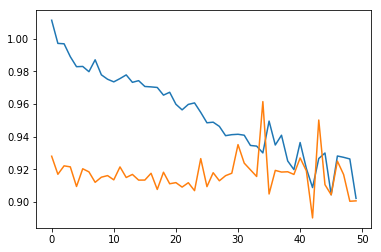

In [39]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

### CNN

In [ ]:
##fixed? 

In [23]:
model_cnn = build_cnn_model(X_train.shape[1:], Y_train.shape[1], 32, L=3, 
                        kernel_s =5, pool=3, BN=False, drop=0.25,padding='valid',dil_r=1 )
model_cnn.compile(loss='mse', optimizer='adam')
model_cnn.summary()

hist = train_model(model_cnn, X_train, Ystd_train, epochs=50, batch_size=128, val_split=0.2)
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

Y_test_hat = model_cnn.predict(X_test)
print("**********************Test**********************")
evaluate_metadata_raw(Y_test, scaler_meta.inverse_transform(Y_test_hat),
                     metadata_used=metadata_used)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2015, 128)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2011, 32)          20512     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2007, 32)          5152      
_________________________________________________________________
dropout_4 (Dropout)          (None, 2007, 32)          0         
_________________________________________________________________
average_pooling1d_1 (Average (None, 669, 32)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 665, 64)           10304     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 661, 64)           20544     
__________

KeyboardInterrupt: 

In [27]:

Y_test_hat = model_cnn.predict(X_test)
print("**********************Test**********************")
evaluate_metadata_raw(Y_test, scaler_meta.inverse_transform(Y_test_hat),
                     metadata_used=metadata_used)

**********************Test**********************


Period       Global
MAE      28.908003    28.908003
MApE    478.733491   478.733491
MSE    2010.727784  2010.727784
MeAE     23.096511    23.096511
RMSLE     1.409070     1.409070

{'MAE': [28.908002806557562, 28.908002806557562],
 'MApE': [478.73349053983236, 478.73349053983236],
 'MSE': [2010.7277837266518, 2010.7277837266518],
 'MeAE': [23.096510577841798, 23.096510577841798],
 'RMSLE': [1.4090695984989587, 1.4090695984989587]}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 2015, 128)         0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 2011, 32)          20512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 2011, 32)          128       
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 2007, 32)          5152      
_________________________________________________________________
batch_normalization_2 (Batch (None, 2007, 32)          128       
_________________________________________________________________
dropout_15 (Dropout)         (None, 2007, 32)          0         
_________________________________________________________________
average_pooling1d_9 (Average (None, 669, 32)           0         
__________

Epoch 47/50
2841/2841 [==============================] - 26s 9ms/step - loss: 0.4259 - val_loss: 0.9227
Epoch 48/50
2841/2841 [==============================] - 26s 9ms/step - loss: 0.3820 - val_loss: 0.9541
Epoch 49/50
2841/2841 [==============================] - 27s 9ms/step - loss: 0.4340 - val_loss: 0.9278
Epoch 50/50
2841/2841 [==============================] - 27s 10ms/step - loss: 0.4196 - val_loss: 1.3135


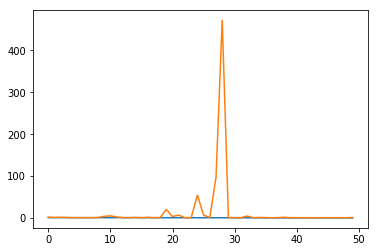

**********************Test**********************


Period       Global
MAE      33.087302    33.087302
MApE    519.042302   519.042302
MSE    4194.432226  4194.432226
MeAE     12.123800    12.123800
RMSLE     1.438144     1.438144

{'MAE': [33.08730225733724, 33.08730225733724],
 'MApE': [519.0423015532513, 519.0423015532513],
 'MSE': [4194.432225589758, 4194.432225589758],
 'MeAE': [12.12380048652832, 12.12380048652832],
 'RMSLE': [1.4381439026666547, 1.4381439026666547]}

In [34]:
model_cnn2 = build_cnn_model(X_train.shape[1:], Y_train.shape[1], 32, L=3, 
                        kernel_s =5, pool=3, BN=True, drop=0.5,padding='valid',dil_r=1 )
model_cnn2.compile(loss='mse', optimizer='adam') 
model_cnn2.summary() #con BN

hist = train_model(model_cnn2, X_train, Ystd_train, epochs=50, batch_size=128, val_split=0.2)
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

Y_test_hat = model_cnn2.predict(X_test)
print("**********************Test**********************")
evaluate_metadata_raw(Y_test, scaler_meta.inverse_transform(Y_test_hat),
                     metadata_used=metadata_used)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 2015, 128)         0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 2008, 32)          32800     
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 2001, 32)          8224      
_________________________________________________________________
dropout_8 (Dropout)          (None, 2001, 32)          0         
_________________________________________________________________
average_pooling1d_4 (Average (None, 400, 32)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 393, 64)           16448     
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 386, 64)           32832     
__________

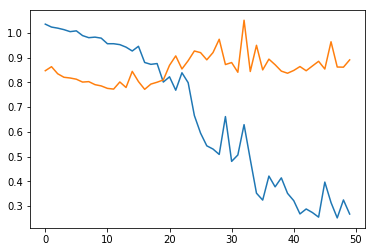

**********************Test**********************


Period       Global
MAE      21.890044    21.890044
MApE    246.180688   246.180688
MSE    1919.592066  1919.592066
MeAE     10.580853    10.580853
RMSLE     1.123818     1.123818

{'MAE': [21.890043605103383, 21.890043605103383],
 'MApE': [246.18068771182152, 246.18068771182152],
 'MSE': [1919.592065805974, 1919.592065805974],
 'MeAE': [10.580853113066405, 10.580853113066405],
 'RMSLE': [1.1238175547430829, 1.1238175547430829]}

In [32]:
model_cnn3 = build_cnn_model(X_train.shape[1:], Y_train.shape[1], 32, L=3, 
                        kernel_s =8, pool=5, BN=False, drop=0.25,padding='valid',dil_r=1 )
model_cnn3.compile(loss='mse', optimizer='adam')
model_cnn3.summary() #pool y kernel size mas grandes..

hist = train_model(model_cnn3, X_train, Ystd_train, epochs=50, batch_size=128, val_split=0.2)
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

Y_test_hat = model_cnn3.predict(X_test)
print("**********************Test**********************")
evaluate_metadata_raw(Y_test, scaler_meta.inverse_transform(Y_test_hat),
                     metadata_used=metadata_used)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 2015, 128)         0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 2008, 32)          32800     
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 2001, 32)          8224      
_________________________________________________________________
dropout_19 (Dropout)         (None, 2001, 32)          0         
_________________________________________________________________
average_pooling1d_12 (Averag (None, 400, 32)           0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 393, 64)           16448     
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 386, 64)           32832     
__________

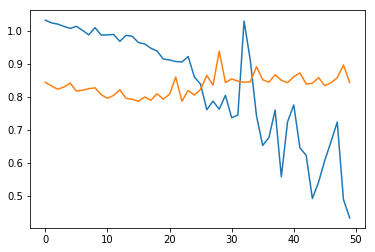

**********************Test**********************


Period       Global
MAE      22.244473    22.244473
MApE    258.198102   258.198102
MSE    1907.214065  1907.214065
MeAE     12.796059    12.796059
RMSLE     1.150099     1.150099

{'MAE': [22.24447312149354, 22.24447312149354],
 'MApE': [258.19810155623077, 258.19810155623077],
 'MSE': [1907.214065238548, 1907.214065238548],
 'MeAE': [12.796058532368164, 12.796058532368164],
 'RMSLE': [1.1500993953068688, 1.1500993953068688]}

In [35]:
model_cnn3 = build_cnn_model(X_train.shape[1:], Y_train.shape[1], 32, L=3, 
                        kernel_s =8, pool=5, BN=False, drop=0.5,padding='valid',dil_r=1 )
model_cnn3.compile(loss='mse', optimizer='adam')
model_cnn3.summary() #pool y kernel size mas grandes..

hist = train_model(model_cnn3, X_train, Ystd_train, epochs=50, batch_size=128, val_split=0.2)
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

Y_test_hat = model_cnn3.predict(X_test)
print("**********************Test**********************")
evaluate_metadata_raw(Y_test, scaler_meta.inverse_transform(Y_test_hat),
                     metadata_used=metadata_used) #mucho mas dropa...

In [ ]:
model_cnn4 = build_cnn_model(X_train.shape[1:], Y_train.shape[1], 32, L=4, 
                        kernel_s =5, pool=3, BN=False, drop=0.25,padding='valid',dil_r=1 )
model_cnn4.compile(loss='mse', optimizer='adam')
model_cnn4.summary()

hist = train_model(model_cnn4, X_train, Ystd_train, epochs=50, batch_size=128, val_split=0.2)
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

Y_test_hat = model_cnn4.predict(X_test)
print("**********************Test**********************")
evaluate_metadata_raw(Y_test, scaler_meta.inverse_transform(Y_test_hat),
                     metadata_used=metadata_used)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 2015, 128)         0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 2008, 32)          32800     
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 2001, 32)          8224      
_________________________________________________________________
dropout_12 (Dropout)         (None, 2001, 32)          0         
_________________________________________________________________
average_pooling1d_7 (Average (None, 400, 32)           0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 393, 64)           16448     
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 386, 64)           32832     
__________

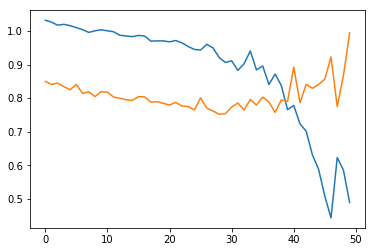

**********************Test**********************


Period       Global
MAE      28.856767    28.856767
MApE    447.564203   447.564203
MSE    2273.839942  2273.839942
MeAE     17.332090    17.332090
RMSLE     1.359601     1.359601

{'MAE': [28.856767448571876, 28.856767448571876],
 'MApE': [447.5642034573741, 447.5642034573741],
 'MSE': [2273.8399422189923, 2273.8399422189923],
 'MeAE': [17.33208992208008, 17.33208992208008],
 'RMSLE': [1.3596011278056943, 1.3596011278056943]}

In [33]:
model_cnn4 = build_cnn_model(X_train.shape[1:], Y_train.shape[1], 32, L=2, 
                        kernel_s =8, pool=5, BN=False, drop=0.25,padding='valid',dil_r=1 )
model_cnn4.compile(loss='mse', optimizer='adam')
model_cnn4.summary()

hist = train_model(model_cnn4, X_train, Ystd_train, epochs=50, batch_size=128, val_split=0.2)
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

Y_test_hat = model_cnn4.predict(X_test)
print("**********************Test**********************")
evaluate_metadata_raw(Y_test, scaler_meta.inverse_transform(Y_test_hat),
                     metadata_used=metadata_used)

### CNN K-max pool

In [ ]:
model_kpool = build_kpool_model(X_train.shape[1:], Y_train.shape[1], 32, L=3,
                        kernel_s =5, K_top=80, BN = False, drop=0.2, padding='valid') #menos k??
model_kpool.compile(loss='mse', optimizer='adam')
model_kpool.summary()

hist = train_model(model_kpool, X_train, Ystd_train, epochs=100, batch_size=64, val_split=0.2)

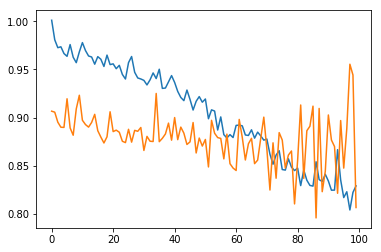

In [74]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

In [ ]:
#for probando
capas = [3]
units = [16,32]
Ks = [80,100]
kernel_s = [5]

#for L in capas:
for unit in units:
    for K in Ks:
        #for kernel in kernel_s:
        print("L, unit, K , kernel = ",L, unit,K, kernel)
        model_kpool = build_kpool_model(X_train.shape[1:], Y_train.shape[1], unit, L=L,
                                kernel_s =kernel, K_top=K, BN = False, drop=0, padding='valid')
        model_kpool.compile(loss='mse', optimizer='adam')

        hist = train_model(model_kpool, X_train, Ystd_train, epochs=100, batch_size=64, val_split=0.2,verb=0)
        plt.plot(hist.history["loss"])
        plt.plot(hist.history["val_loss"])
        plt.show()

        Y_test_hat = model_kpool.predict(X_test)
        print("**********************Test**********************")
        evaluate_metadata_raw(Y_test, scaler_meta.inverse_transform(Y_test_hat),
             metadata_used=metadata_used)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 2015, 128)         0         
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 2011, 32)          20512     
_________________________________________________________________
conv1d_48 (Conv1D)           (None, 2007, 32)          5152      
_________________________________________________________________
dropout_35 (Dropout)         (None, 2007, 32)          0         
_________________________________________________________________
average_pooling1d_24 (Averag (None, 669, 32)           0         
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 665, 64)           10304     
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 661, 64)           20544     
__________

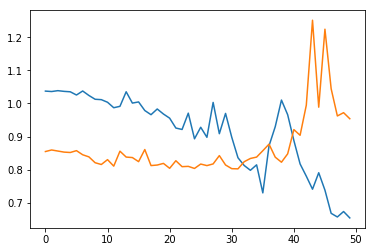

**********************Test**********************


Period       Global
MAE      23.642675    23.642675
MApE    338.519065   338.519065
MSE    1794.339698  1794.339698
MeAE     16.917696    16.917696
RMSLE     1.233602     1.233602

{'MAE': [23.64267540045778, 23.64267540045778],
 'MApE': [338.51906528493777, 338.51906528493777],
 'MSE': [1794.3396983358011, 1794.3396983358011],
 'MeAE': [16.91769573305664, 16.91769573305664],
 'RMSLE': [1.2336022128111512, 1.2336022128111512]}

In [39]:
#cnn y una capa arriba recurrente pra la tarea..

concat_model = build_cnn_model(X_train.shape[1:], Y_train.shape[1], 32, L=2, 
                        kernel_s =5, pool=3, BN=False, drop=0.25,padding='valid',dil_r=1 ) #fixed..
concat_model.pop()
concat_model.pop()
concat_model.pop()
concat_model.pop()
concat_model.add(BatchNormalization())
model_gru = build_rnn_model(concat_model.output_shape[1:], Y_train.shape[1], 128, layers=1, bid=False, gru=True, 
                            drop=0.2)

concat_model.add(model_gru)
concat_model.compile(loss='mse', optimizer='adam')
concat_model.summary()

hist = train_model(concat_model, X_train, Ystd_train, epochs=50, batch_size=128, val_split=0.2)
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

Y_test_hat = concat_model.predict(X_test)
print("**********************Test**********************")
evaluate_metadata_raw(Y_test, scaler_meta.inverse_transform(Y_test_hat),
                     metadata_used=metadata_used)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 2015, 128)         0         
_________________________________________________________________
conv1d_53 (Conv1D)           (None, 2011, 32)          20512     
_________________________________________________________________
conv1d_54 (Conv1D)           (None, 2007, 32)          5152      
_________________________________________________________________
dropout_41 (Dropout)         (None, 2007, 32)          0         
_________________________________________________________________
average_pooling1d_27 (Averag (None, 669, 32)           0         
_________________________________________________________________
conv1d_55 (Conv1D)           (None, 665, 64)           10304     
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 661, 64)           20544     
__________

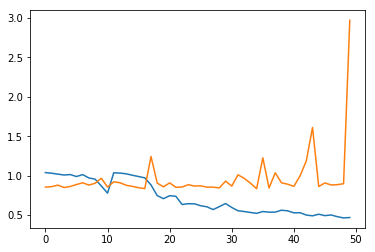

**********************Test**********************


Period       Global
MAE      65.666114    65.666114
MApE   1177.032672  1177.032672
MSE    8082.734699  8082.734699
MeAE     38.461812    38.461812
RMSLE     1.945432     1.945432

{'MAE': [65.6661136261293, 65.6661136261293],
 'MApE': [1177.0326718904573, 1177.0326718904573],
 'MSE': [8082.734699111509, 8082.734699111509],
 'MeAE': [38.46181155422852, 38.46181155422852],
 'RMSLE': [1.9454320404234586, 1.9454320404234586]}

In [40]:
#cnn y una capa arriba recurrente pra la tarea..

concat_model = build_cnn_model(X_train.shape[1:], Y_train.shape[1], 32, L=2, 
                        kernel_s =5, pool=3, BN=False, drop=0.25,padding='valid',dil_r=1 ) #fixed..
concat_model.pop()
concat_model.pop()
concat_model.pop()
concat_model.pop()
concat_model.add(BatchNormalization())
model_gru = build_rnn_model(concat_model.output_shape[1:], Y_train.shape[1], 128, layers=1, bid=False, gru=True, 
                            drop=0.2)

concat_model.add(model_gru)
concat_model.compile(loss='mse', optimizer='adam')
concat_model.summary()

hist = train_model(concat_model, X_train, Ystd_train, epochs=50, batch_size=128, val_split=0.2)
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

Y_test_hat = concat_model.predict(X_test)
print("**********************Test**********************")
evaluate_metadata_raw(Y_test, scaler_meta.inverse_transform(Y_test_hat),
                     metadata_used=metadata_used)

In [41]:
#cnn y una capa arriba recurrente pra la tarea..

concat_model = build_cnn_model(X_train.shape[1:], Y_train.shape[1], 128, L=2, 
                        kernel_s =5, pool=3, BN=False, drop=0.25,padding='valid',dil_r=1, fixed=True )
concat_model.pop()
concat_model.pop()
concat_model.pop()
concat_model.pop()
concat_model.add(BatchNormalization())
model_gru = build_rnn_model(concat_model.output_shape[1:], Y_train.shape[1], 128, layers=1, bid=False, gru=True, 
                            drop=0.2)

concat_model.add(model_gru)
concat_model.compile(loss='mse', optimizer='adam')
concat_model.summary()

hist = train_model(concat_model, X_train, Ystd_train, epochs=50, batch_size=128, val_split=0.2)
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

Y_test_hat = concat_model.predict(X_test)
print("**********************Test**********************")
evaluate_metadata_raw(Y_test, scaler_meta.inverse_transform(Y_test_hat),
                     metadata_used=metadata_used)

TypeError: build_cnn_model() got an unexpected keyword argument 'fixed'

### CNN casual+dilation 
> WaveNet

In [ ]:
model_cnn_caus = build_cnn_model(X_train.shape[1:], Y_train.shape[1], 64, L=6, 
                        kernel_s =5, BN=False, drop=0.2, padding='causal',dil_r=2 )
model_cnn_caus.compile(loss='mse', optimizer='adam')
model_cnn_caus.summary()

hist = train_model(model_cnn_caus, X_train, Ystd_train, epochs=50, batch_size=64, val_split=0.2)
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

In [21]:
%%time
Y_train_hat = model_simple.predict(X_train, batch_size=1024)
Y_test_hat = model_simple.predict(X_test, batch_size=1024)

CPU times: user 6.57 s, sys: 2.03 s, total: 8.6 s
Wall time: 3.3 s


In [33]:
%%time
model = model_kpool
Y_train_hat = model.predict(X_train, batch_size=1024)
Y_test_hat = model.predict(X_test, batch_size=1024)

CPU times: user 1min 5s, sys: 14.2 s, total: 1min 19s
Wall time: 8.19 s


## Evaluate

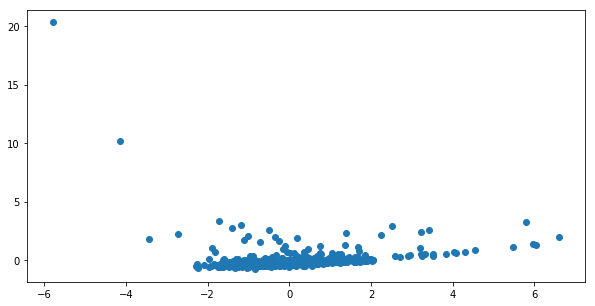

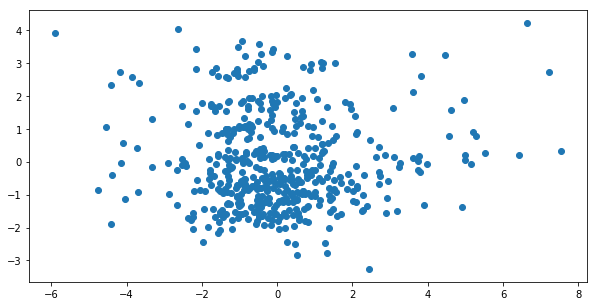

In [42]:
from sklearn.decomposition import PCA
aux_model = PCA(2)
plot_enc = aux_model.fit_transform(Y_test_hat)

plt.figure(figsize=(10,5))
plt.scatter(plot_enc[:,0],plot_enc[:,1])
plt.show()

aux_model = PCA(2)
plot_enc = aux_model.fit_transform(Ystd_test)

plt.figure(figsize=(10,5))
plt.scatter(plot_enc[:,0],plot_enc[:,1])
plt.show()

In [22]:
from IPython.display import display, HTML
from evaluation import evaluate_metadata, evaluate_metadata_raw

def plot_n_meta(real, pred, n= 10, plot_real = True):
    if plot_real:
        pred = scaler_meta.inverse_transform(pred)
    for _ in range(n):
        n_sampled = np.random.randint(0,real.shape[0])
        aux = pd.DataFrame()
        aux["Real"] = real[n_sampled]
        aux["Predicted"] = pred[n_sampled]
        aux.index=metadata_used
        display(aux.transpose())
        print("----------------------------------------------------------------")

    
### deprecated
def evaluate_meta(real, pred, scaler_meta, plot=True):
    res_metadata = {}
    inv_real = scaler_meta.inverse_transform(real)
    inv_pred = scaler_meta.inverse_transform(pred)
    
    res = evaluate_metadata(real,pred)
    res_true = evaluate_metadata(inv_real,inv_pred)
    
    res_metadata = {key: [value, res[key]] for key,value in res_true.items() }    
    if plot:
        df = pd.DataFrame(res_metadata)
        df.index = ["Real","Scaled"]
        print(df)
    return res_metadata

In [35]:
###  plot some examples..
print("Train")
plot_n_meta(Y_train, Y_train_hat)
print("Test")
plot_n_meta(Y_test, Y_test_hat)

Train


Period  Duration  Time of Transit Epoch  Inclination  \
Real       35.968269   2.83900              138.66885     88.97000   
Predicted  32.837322   4.72735              156.17514     87.61293   

           Semi-major Axis       r/R         Teq  Transit Number  \
Real              0.227000  0.018000  674.000000       40.000000   
Predicted         0.164976  0.016041  835.386597      188.780365   

           Limb Darkening Coeff1  Limb Darkening Coeff2  
Real                    0.367000               0.286000  
Predicted               0.407819               0.255353

----------------------------------------------------------------


Period  Duration  Time of Transit Epoch  Inclination  \
Real        1.646802  1.196600             132.061500    89.300000   
Predicted  18.373137  2.159765             137.171021    85.320435   

           Semi-major Axis       r/R          Teq  Transit Number  \
Real              0.022000  0.015000   806.000000      807.000000   
Predicted         0.061263  0.017204  1116.647705      699.628479   

           Limb Darkening Coeff1  Limb Darkening Coeff2  
Real                    0.316000               0.387000  
Predicted               0.516683               0.196814

----------------------------------------------------------------


Period  Duration  Time of Transit Epoch  Inclination  \
Real       14.887767  4.981000              141.95432    86.850000   
Predicted  38.168129  5.400047              150.74527    88.219292   

           Semi-major Axis      r/R        Teq  Transit Number  \
Real              0.119000  0.01600  831.00000       91.000000   
Predicted         0.190438  0.01334  780.83252      121.623024   

           Limb Darkening Coeff1  Limb Darkening Coeff2  
Real                    0.315000               0.303000  
Predicted               0.402252               0.261673

----------------------------------------------------------------


Period  Duration  Time of Transit Epoch  Inclination  \
Real       25.762685  6.908000             147.696300    89.320000   
Predicted  66.930138  6.885375             179.079971    89.091835   

           Semi-major Axis       r/R        Teq  Transit Number  \
Real              0.171000  0.023000  633.00000        47.00000   
Predicted         0.281068  0.025438  607.36731        47.25045   

           Limb Darkening Coeff1  Limb Darkening Coeff2  
Real                    0.410000               0.260000  
Predicted               0.400495               0.263634

----------------------------------------------------------------


Period  Duration  Time of Transit Epoch  Inclination  \
Real        1.118548  1.553400             132.848260    87.680000   
Predicted  19.149321  4.120082             139.248062    86.940559   

           Semi-major Axis      r/R          Teq  Transit Number  \
Real              0.019000  0.01400  1174.000000     1192.000000   
Predicted         0.113646  0.01367   963.416992      328.233307   

           Limb Darkening Coeff1  Limb Darkening Coeff2  
Real                    0.685000               0.066000  
Predicted               0.415272               0.256143

----------------------------------------------------------------


Period  Duration  Time of Transit Epoch  Inclination  \
Real        8.506981  2.938000             134.644210    86.530000   
Predicted  23.100954  4.131449             143.688126    87.590782   

           Semi-major Axis       r/R         Teq  Transit Number  \
Real               0.08000  0.018000  900.000000       160.00000   
Predicted          0.12312  0.014855  888.516846       234.33136   

           Limb Darkening Coeff1  Limb Darkening Coeff2  
Real                    0.393000               0.268000  
Predicted               0.404807               0.258538

----------------------------------------------------------------


Period  Duration  Time of Transit Epoch  Inclination  \
Real       34.211502  4.947000             154.575080    89.960000   
Predicted  60.729019  4.713846             165.412384    88.438232   

           Semi-major Axis       r/R         Teq  Transit Number  \
Real              0.189000  0.015000  427.000000       39.000000   
Predicted         0.255712  0.020464  599.412781      143.990051   

           Limb Darkening Coeff1  Limb Darkening Coeff2  
Real                    0.557000                0.16100  
Predicted               0.490832                0.20687

----------------------------------------------------------------


Period  Duration  Time of Transit Epoch  Inclination  \
Real        0.693843  1.619700             132.181570    86.590000   
Predicted -13.999569  1.414462             132.474777    83.930351   

           Semi-major Axis       r/R          Teq  Transit Number  \
Real              0.015000  0.006000  2161.000000     1930.000000   
Predicted         0.002583  0.013212  1408.998413     1060.396362   

           Limb Darkening Coeff1  Limb Darkening Coeff2  
Real                    0.455000               0.233000  
Predicted               0.496514               0.203435

----------------------------------------------------------------


Period  Duration  Time of Transit Epoch  Inclination  \
Real       20.264202  4.664000             135.279190    86.420000   
Predicted  45.664730  5.890095             172.176743    88.855209   

           Semi-major Axis       r/R         Teq  Transit Number  \
Real              0.149000  0.015000  770.000000       51.000000   
Predicted         0.219155  0.022689  674.379211       74.135597   

           Limb Darkening Coeff1  Limb Darkening Coeff2  
Real                    0.366000               0.284000  
Predicted               0.396745               0.265082

----------------------------------------------------------------


Period  Duration  Time of Transit Epoch  Inclination  \
Real       36.292017   8.19800             132.176910    90.000000   
Predicted  15.388481   3.97101             144.371063    85.924698   

           Semi-major Axis       r/R          Teq  Transit Number  \
Real              0.223000  0.018000   694.000000       36.000000   
Predicted         0.104504  0.016489  1074.228271      469.598633   

           Limb Darkening Coeff1  Limb Darkening Coeff2  
Real                    0.405000               0.264000  
Predicted               0.429813               0.247873

----------------------------------------------------------------
Test


Period  Duration  Time of Transit Epoch  Inclination  \
Real       13.722368  5.123100              137.84083    89.980000   
Predicted   8.599157  5.093306              164.02800    89.032402   

           Semi-major Axis       r/R         Teq  Transit Number  \
Real              0.105000  0.022000  746.000000       97.000000   
Predicted         0.107747  0.029436  702.213806      141.968903   

           Limb Darkening Coeff1  Limb Darkening Coeff2  
Real                     0.37300               0.279000  
Predicted                0.39482               0.280912

----------------------------------------------------------------


Period  Duration  Time of Transit Epoch  Inclination  \
Real        1.855558  2.356720             137.181028    84.470000   
Predicted  13.342141  2.507035             151.040009    89.250885   

           Semi-major Axis       r/R          Teq  Transit Number  \
Real              0.029000  0.097000  1436.000000      725.000000   
Predicted         0.045111  0.050715  1417.306152      586.108887   

           Limb Darkening Coeff1  Limb Darkening Coeff2  
Real                    0.393000               0.268000  
Predicted               0.398918               0.245121

----------------------------------------------------------------


Period  Duration  Time of Transit Epoch  Inclination  \
Real       11.008176  2.013000             143.226110    89.970000   
Predicted  14.440279  2.253772             148.765884    86.746582   

           Semi-major Axis       r/R        Teq  Transit Number  \
Real                0.0820  0.034000  488.00000      125.000000   
Predicted           0.0801  0.018697  927.16156      497.826233   

           Limb Darkening Coeff1  Limb Darkening Coeff2  
Real                    0.644000               0.101000  
Predicted               0.482159               0.219235

----------------------------------------------------------------


Period  Duration  Time of Transit Epoch  Inclination  \
Real       44.964075  4.981000              144.56002    89.910000   
Predicted  50.978561  4.764045              173.82724    90.089989   

           Semi-major Axis       r/R         Teq  Transit Number  \
Real                0.2300  0.025000  379.000000       30.000000   
Predicted           0.2548  0.041799  545.421265      108.599762   

           Limb Darkening Coeff1  Limb Darkening Coeff2  
Real                    0.632000               0.105000  
Predicted               0.412916               0.261538

----------------------------------------------------------------


Period  Duration  Time of Transit Epoch  Inclination  \
Real       10.712535  2.718600             137.164990    88.160000   
Predicted  17.078119  3.737796             147.480118    87.216583   

           Semi-major Axis       r/R         Teq  Transit Number  \
Real              0.078000  0.034000  485.000000      105.000000   
Predicted         0.104427  0.018169  950.515808      244.080963   

           Limb Darkening Coeff1  Limb Darkening Coeff2  
Real                    0.574000               0.150000  
Predicted               0.422406               0.247769

----------------------------------------------------------------


Period  Duration  Time of Transit Epoch  Inclination  \
Real        6.098556  2.981500             135.929060    89.220000   
Predicted  12.949014  3.030324             158.476089    88.774986   

           Semi-major Axis       r/R         Teq  Transit Number  \
Real              0.063000  0.008000  927.000000      196.000000   
Predicted         0.098479  0.024134  672.663574      113.753166   

           Limb Darkening Coeff1  Limb Darkening Coeff2  
Real                    0.453000               0.233000  
Predicted               0.476994               0.225329

----------------------------------------------------------------


Period  Duration  Time of Transit Epoch  Inclination  \
Real        2.553150   1.84900             132.448490    88.190000   
Predicted  67.403053   6.74118             177.730606    89.123703   

           Semi-major Axis       r/R          Teq  Transit Number  \
Real              0.037000  0.013000  1312.000000       448.00000   
Predicted         0.277282  0.024538   625.071472        57.38456   

           Limb Darkening Coeff1  Limb Darkening Coeff2  
Real                    0.345000               0.292000  
Predicted               0.397075               0.265404

----------------------------------------------------------------


Period  Duration  Time of Transit Epoch  Inclination  \
Real        5.700706  1.640800              132.69229     88.15000   
Predicted  24.271538  4.777128              148.87764     88.16011   

           Semi-major Axis       r/R          Teq  Transit Number  \
Real              0.064000  0.019000  1035.000000       221.00000   
Predicted         0.146759  0.017119   862.380859       152.46492   

           Limb Darkening Coeff1  Limb Darkening Coeff2  
Real                    0.366000               0.284000  
Predicted               0.396859               0.261537

----------------------------------------------------------------


Period  Duration  Time of Transit Epoch  Inclination  \
Real       19.986592  4.391000             135.522650    85.750000   
Predicted  17.276369  3.830859             140.285553    87.250336   

           Semi-major Axis       r/R         Teq  Transit Number  \
Real              0.140000  0.031000  720.000000       68.000000   
Predicted         0.106409  0.014524  944.383179      303.552277   

           Limb Darkening Coeff1  Limb Darkening Coeff2  
Real                    0.455000               0.233000  
Predicted               0.416118               0.253695

----------------------------------------------------------------


Period  Duration  Time of Transit Epoch  Inclination  \
Real       43.034336  6.571000             137.690070    88.070000   
Predicted  45.768337  5.363133             176.420486    89.455696   

           Semi-major Axis       r/R         Teq  Transit Number  \
Real              0.233000  0.025000  484.000000       27.000000   
Predicted         0.221241  0.028321  543.612549       30.319876   

           Limb Darkening Coeff1  Limb Darkening Coeff2  
Real                    0.453000               0.233000  
Predicted               0.441317               0.234996

----------------------------------------------------------------


#### evaluate by column


In [23]:
print("**********************Train**********************")
evaluate_metadata_raw(scaler_meta.inverse_transform(Ystd_train), scaler_meta.inverse_transform(Y_train_hat),
                     metadata_used=metadata_used)
print("**********************Test**********************")
evaluate_metadata_raw(scaler_meta.inverse_transform(Ystd_test), scaler_meta.inverse_transform(Y_test_hat),
                     metadata_used=metadata_used) #simple

**********************Train**********************


Period   Duration  Time of Transit Epoch  Inclination  \
MAE      24.962333   1.757245              24.477475     1.967178   
MApE    352.003952  52.040690              13.904120     2.409277   
MSE    2775.905133   6.950051            1735.333223    12.035770   
MeAE     17.383145   1.338850              18.910277     1.598384   
RMSLE     1.257925   0.424071               0.195343     0.045165   

       Semi-major Axis        r/R            Teq  Transit Number  \
MAE           0.089477   0.009467     288.384425      167.007103   
MApE        114.188987  48.246836      42.782755      331.605804   
MSE           0.021912   0.000265  144623.122612    83944.540924   
MeAE          0.064892   0.006922     236.328033      121.643578   
RMSLE         0.109671   0.014913       0.459701        1.322100   

       Limb Darkening Coeff1  Limb Darkening Coeff2        Global  
MAE                 0.080461               0.051917     50.878708  
MApE               19.449320              29.213462    100.584520  
MSE                 0.009586               0.004406  23309.792388  
MeAE                0.074480               0.045977     39.739454  
RMSLE               0.067360               0.054282      0.395053

**********************Test**********************


Period   Duration  Time of Transit Epoch  Inclination  \
MAE      24.575240   1.843374              25.354540     1.983744   
MApE    339.682799  53.045987              14.433631     2.396241   
MSE    1879.285816   6.928522            1710.455258    10.939832   
MeAE     17.777108   1.387015              19.513426     1.607633   
RMSLE     1.255863   0.444779               0.197794     0.041501   

       Semi-major Axis        r/R            Teq  Transit Number  \
MAE           0.089887   0.009955     262.746661      161.179408   
MApE        112.213800  47.365156      39.668716      322.162357   
MSE           0.018793   0.000483  117814.507963    78222.109861   
MeAE          0.069765   0.006999     223.571167      116.893280   
RMSLE         0.106375   0.019542       0.433691        1.310417   

       Limb Darkening Coeff1  Limb Darkening Coeff2        Global  
MAE                 0.079481               0.050842     47.791313  
MApE               18.697662              30.004794     97.967114  
MSE                 0.009367               0.004169  19964.426006  
MeAE                0.074895               0.044952     38.094624  
RMSLE               0.066178               0.053232      0.392937

{'MAE': [24.575239843396414,
  1.843373827219957,
  25.35453984197285,
  1.9837436033947629,
  0.08988650480197502,
  0.009954606018857198,
  262.7466611956606,
  161.1794084605604,
  0.0794805030298705,
  0.05084173560166123,
  47.79131301216573],
 'MApE': [339.6827989669769,
  53.04598673454461,
  14.433631407124462,
  2.396240798366084,
  112.2137997815652,
  47.36515642261941,
  39.66871584867032,
  322.16235680610816,
  18.69766248015925,
  30.0047939913506,
  97.9671143237485],
 'MSE': [1879.285815794876,
  6.928521508520139,
  1710.45525801533,
  10.939832003098807,
  0.018792763062563646,
  0.00048262343706829963,
  117814.50796286539,
  78222.10986114114,
  0.009367458705435408,
  0.004169346074253799,
  19964.42600635196],
 'MeAE': [17.77710774953125,
  1.387015328979492,
  19.513425708007816,
  1.6076330566406227,
  0.06976527881622314,
  0.006998895004391669,
  223.5711669921875,
  116.89328002929688,
  0.07489500474929811,
  0.044951915383338925,
  38.094623995859685],
 'R

In [28]:
print("**********************Train**********************")
evaluate_metadata_raw(scaler_meta.inverse_transform(Ystd_train), scaler_meta.inverse_transform(Y_train_hat),
                     metadata_used=metadata_used)
print("**********************Test**********************")
evaluate_metadata_raw(scaler_meta.inverse_transform(Ystd_test), scaler_meta.inverse_transform(Y_test_hat),
                     metadata_used=metadata_used) #cnn

**********************Train**********************


Period   Duration  Time of Transit Epoch  Inclination  \
MAE     13.068994   1.212200              19.243824     1.832825   
MApE   140.212151  31.375801              11.039661     2.227890   
MSE    869.116905   3.783902            1181.248343     9.881922   
MeAE     6.093614   0.774234              13.238217     1.221547   
RMSLE    0.813732   0.308114               0.161451     0.041087   

       Semi-major Axis        r/R           Teq  Transit Number  \
MAE           0.049725   0.007030    203.109426      135.497588   
MApE         55.036873  37.654023     29.532940      213.019597   
MSE           0.007677   0.000124  77553.931127    53526.854910   
MeAE          0.029153   0.005346    156.012238       84.034580   
RMSLE         0.066810   0.010412      0.373354        1.078957   

       Limb Darkening Coeff1  Limb Darkening Coeff2        Global  
MAE                 0.074105               0.048855     37.414457  
MApE               18.416837              25.938311     56.445408  
MSE                 0.008236               0.003964  13314.483711  
MeAE                0.065804               0.041294     26.151603  
RMSLE               0.062776               0.051182      0.296787

**********************Test**********************


Period   Duration  Time of Transit Epoch  Inclination  \
MAE      21.070577   1.638998              23.311137     2.055609   
MApE    243.055520  40.901853              13.067943     2.476073   
MSE    2003.114992   6.898591            1737.039381    11.527436   
MeAE      7.516153   0.914965              15.011577     1.382113   
RMSLE     1.164805   0.416212               0.199658     0.042466   

       Semi-major Axis        r/R            Teq  Transit Number  \
MAE           0.077559   0.009228     256.838161      168.165564   
MApE         83.779080  42.512291      38.794038      344.960207   
MSE           0.018906   0.000482  119403.028709    79740.023604   
MeAE          0.039827   0.006425     191.434509      100.158020   
RMSLE         0.106503   0.019411       0.427697        1.294304   

       Limb Darkening Coeff1  Limb Darkening Coeff2        Global  
MAE                 0.075672               0.049400     47.329190  
MApE               18.191565              27.649706     85.538828  
MSE                 0.008355               0.003828  20290.166428  
MeAE                0.069524               0.043318     31.657643  
RMSLE               0.062725               0.050809      0.378459

{'MAE': [21.070577308504337,
  1.638997517443213,
  23.311136658821933,
  2.055608823870668,
  0.07755918537713219,
  0.009227709283657593,
  256.83816075088953,
  168.16556362869716,
  0.07567230697150278,
  0.04939987708129505,
  47.329190376694044],
 'MApE': [243.05552040752062,
  40.90185318425973,
  13.067942547652686,
  2.4760730261506994,
  83.7790804812369,
  42.51229132118427,
  38.794037772412274,
  344.9602071722344,
  18.191564874256063,
  27.649706083077184,
  85.53882768699847],
 'MSE': [2003.1149918695908,
  6.8985913880264,
  1737.0393805426763,
  11.527436437569392,
  0.018906337583509823,
  0.00048166721535145414,
  119403.02870902183,
  79740.02360429226,
  0.00835486854236408,
  0.0038282873480070395,
  20290.166428471268],
 'MeAE': [7.516152948339844,
  0.9149646949768067,
  15.01157687011721,
  1.3821127319335886,
  0.03982695966958999,
  0.006425477445125578,
  191.43450927734375,
  100.15802001953124,
  0.06952363228797914,
  0.043318410873413093,
  31.657643102

In [31]:
print("**********************Train**********************")
evaluate_metadata_raw(scaler_meta.inverse_transform(Ystd_train), scaler_meta.inverse_transform(Y_train_hat),
                     metadata_used=metadata_used)
print("**********************Test**********************")
evaluate_metadata_raw(scaler_meta.inverse_transform(Ystd_test), scaler_meta.inverse_transform(Y_test_hat),
                     metadata_used=metadata_used) #kmaxpool

**********************Train**********************


Period   Duration  Time of Transit Epoch  Inclination  \
MAE      19.005626   1.419307              21.097286     1.858076   
MApE    204.895244  38.086330              11.838734     2.269451   
MSE    2324.906476   5.430307            1517.342630    10.766392   
MeAE      9.248928   0.853616              14.696285     1.352444   
RMSLE     1.043147   0.361896               0.179766     0.042815   

       Semi-major Axis        r/R            Teq  Transit Number  \
MAE           0.068687   0.007398     240.106247      150.395949   
MApE         74.055834  39.619943      35.197179      274.575694   
MSE           0.016911   0.000135  108906.877983    68342.148764   
MeAE          0.038707   0.005819     182.151367       93.472351   
RMSLE         0.094110   0.010905       0.398201        1.214094   

       Limb Darkening Coeff1  Limb Darkening Coeff2        Global  
MAE                 0.072260               0.047198     43.407803  
MApE               17.516662              26.321990     72.437706  
MSE                 0.008179               0.003893  18110.750167  
MeAE                0.061407               0.037245     30.191817  
RMSLE               0.062239               0.050957      0.345813

**********************Test**********************


Period   Duration  Time of Transit Epoch  Inclination  \
MAE      19.980560   1.552461              23.789185     2.010539   
MApE    249.772180  41.297813              13.339335     2.422597   
MSE    1748.464852   5.987551            1778.492836    11.953485   
MeAE     10.054932   0.918946              16.631180     1.446089   
RMSLE     1.122965   0.401895               0.198067     0.043608   

       Semi-major Axis        r/R            Teq  Transit Number  \
MAE           0.075116   0.009759     249.548491      156.180607   
MApE         87.654631  44.216235      36.868365      309.791877   
MSE           0.016924   0.000588  120047.993356    77446.621974   
MeAE          0.042732   0.006460     191.934082       88.823853   
RMSLE         0.099657   0.021181       0.415911        1.257112   

       Limb Darkening Coeff1  Limb Darkening Coeff2        Global  
MAE                 0.074394               0.047913     45.326902  
MApE               17.370466              28.204190     83.093769  
MSE                 0.008546               0.003851  20103.954396  
MeAE                0.064416               0.038514     30.996120  
RMSLE               0.063158               0.051173      0.367473

{'MAE': [19.980560123530065,
  1.5524612536862628,
  23.789184819798113,
  2.010538650663772,
  0.0751159104293028,
  0.009758506138047369,
  249.5484906187152,
  156.18060746502758,
  0.07439432253554316,
  0.04791281163149542,
  45.326902448215534],
 'MApE': [249.77218033051156,
  41.29781278561232,
  13.339334681947266,
  2.4225972780943015,
  87.65463054216086,
  44.21623531811225,
  36.86836502595062,
  309.79187668960446,
  17.370466015313706,
  28.204190039818677,
  83.0937688707126],
 'MSE': [1748.464851735621,
  5.987550896352244,
  1778.4928357105389,
  11.953485295397904,
  0.016924280645377245,
  0.0005882228872286184,
  120047.99335603317,
  77446.6219735464,
  0.008545688347867163,
  0.0038507776627324797,
  20103.954396218705],
 'MeAE': [10.054931698022461,
  0.9189458007812501,
  16.63118013183592,
  1.4460888671874983,
  0.04273154914379121,
  0.006459864690899847,
  191.93408203125,
  88.8238525390625,
  0.06441573333740236,
  0.03851419234275816,
  30.996120240765446

In [34]:
print("**********************Train**********************")
evaluate_metadata_raw(scaler_meta.inverse_transform(Ystd_train), scaler_meta.inverse_transform(Y_train_hat),
                     metadata_used=metadata_used)
print("**********************Test**********************")
evaluate_metadata_raw(scaler_meta.inverse_transform(Ystd_test), scaler_meta.inverse_transform(Y_test_hat),
                     metadata_used=metadata_used) #kmaxpool -V2

**********************Train**********************


Period   Duration  Time of Transit Epoch  Inclination  \
MAE      20.920315   1.337555              22.080556     1.813828   
MApE    252.198378  39.054129              12.790852     2.214849   
MSE    1991.569034   4.374810            1465.887344    10.452993   
MeAE     11.589850   0.859648              14.842190     1.181031   
RMSLE     1.084911   0.338300               0.180456     0.042135   

       Semi-major Axis        r/R            Teq  Transit Number  \
MAE           0.070604   0.007288     240.240664      139.237661   
MApE         85.077601  38.995059      33.111068      207.203669   
MSE           0.013833   0.000128  107564.227012    61952.538505   
MeAE          0.043928   0.005765     180.933380       76.174042   
RMSLE         0.087457   0.010622       0.436457        1.236933   

       Limb Darkening Coeff1  Limb Darkening Coeff2        Global  
MAE                 0.071877               0.046874     42.582722  
MApE               17.197152              26.536558     71.437931  
MSE                 0.008159               0.003891  17298.907571  
MeAE                0.060028               0.036555     28.572642  
RMSLE               0.062046               0.051025      0.353034

**********************Test**********************


Period   Duration  Time of Transit Epoch  Inclination  \
MAE      26.656466   1.730587              25.164723     2.085489   
MApE    359.209091  47.693456              14.507317     2.514649   
MSE    2421.734738   7.255215            1826.075727    11.918164   
MeAE     12.555651   0.969312              16.479471     1.409066   
RMSLE     1.313562   0.424900               0.209361     0.043071   

       Semi-major Axis        r/R            Teq  Transit Number  \
MAE           0.090368   0.009608     258.165298      168.141293   
MApE        109.640070  43.670154      38.339515      342.403424   
MSE           0.022503   0.000480  123675.342751    90768.075350   
MeAE          0.046686   0.006387     202.738098       86.963417   
RMSLE         0.115992   0.019430       0.445732        1.526287   

       Limb Darkening Coeff1  Limb Darkening Coeff2        Global  
MAE                 0.073573               0.047623     48.216503  
MApE               17.059601              28.336380    100.337366  
MSE                 0.008436               0.003883  21871.043725  
MeAE                0.062567               0.036616     32.126727  
RMSLE               0.062686               0.051420      0.421244

{'MAE': [26.65646613301059,
  1.7305869370508478,
  25.16472344051671,
  2.0854888021639075,
  0.09036848741840608,
  0.00960754139190263,
  258.1652976460976,
  168.14129264378312,
  0.073572562769616,
  0.047622589586040764,
  48.21650267837887],
 'MApE': [359.2090907225054,
  47.69345567022337,
  14.507317225732319,
  2.514648566307226,
  109.64007000648586,
  43.67015362394192,
  38.33951530889823,
  342.4034243636621,
  17.059600862619007,
  28.336379657869955,
  100.33736560082454],
 'MSE': [2421.734738364122,
  7.255215358148769,
  1826.0757273483853,
  11.918163729026563,
  0.02250270549327637,
  0.0004800693280282515,
  123675.34275123903,
  90768.07535017513,
  0.008435986111195415,
  0.003883350782969836,
  21871.043724832558],
 'MeAE': [12.555650753281249,
  0.9693124160766606,
  16.47947077636718,
  1.4090655517578057,
  0.04668580579757692,
  0.006387171894311906,
  202.73809814453125,
  86.96341705322266,
  0.0625670990943909,
  0.03661644411087034,
  32.1267271216134],


### acc obtain with new encoder rep..

In [36]:
Y_aux_train = scaler_meta.transform(df_meta_obj.values[mask_train])
Y_aux_test  = scaler_meta.transform(df_meta_obj.values[mask_test])

#labels
exop_train = 1*(all_labels=="CONFIRMED")[mask_train].values
exop_test = 1*(all_labels=="CONFIRMED")[mask_test].values

print("Metadata train shape: ",Y_aux_train.shape)
print("Metadata test shape: ", Y_aux_test.shape)
print("Exo-Label train shape: ",exop_train.shape)
print("Exo-Label test shape: ",exop_test.shape)

Metadata train shape:  (4692, 10)
Metadata test shape:  (1565, 10)
Exo-Label train shape:  (4692,)
Exo-Label test shape:  (1565,)


In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, f1_score, recall_score, accuracy_score, precision_score
scorers = {
    'f1_score_we':make_scorer(f1_score,average='weighted'),
    'f1_score_macro':make_scorer(f1_score,average='macro'),
    'f1_score_micro':make_scorer(f1_score,average='micro')
}

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1, random_state=0)
param_grid = {
    'n_estimators' : [10,20,30,40,50,60,70,80,90,100],
    'min_samples_split': [2,5,10,15,20,25],
    #'max_depth': np.arange(5,25),
    'class_weight' : ['balanced','balanced_subsample',None]
}

skf = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit='f1_score_we',
                       cv=skf, return_train_score=False, n_jobs=-1)
grid_search.fit(Y_aux_train, exop_train)

print('Best params for completeness:', grid_search.best_params_)
results = pd.DataFrame(grid_search.cv_results_)
bestResults = results[results.params == grid_search.best_params_]
f1_w = float(bestResults['mean_test_f1_score_we'])
print('F1-score weighted: {:.4f}'.format(f1_w))
f1_ma = float(bestResults['mean_test_f1_score_macro'])
print('F1-score macro: {:.4f}'.format(f1_ma))
f1_mi = float(bestResults['mean_test_f1_score_micro'])
print('F1-score micro: {:.4f}'.format(f1_mi))

/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Best params for completeness: {'min_samples_split': 5, 'n_estimators': 80, 'class_weight': 'balanced_subsample'}
F1-score weighted: 0.9019
F1-score macro: 0.8965
F1-score micro: 0.9013


#### Baseline model (real metadata)

Train


F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.995024  0.995311  0.996220     0.995314       0.998278   
Confirmed       0.995024  0.995311  0.993827     0.995314       0.990492   

                Recall raw  
False Positive    0.994170  
Confirmed         0.997185

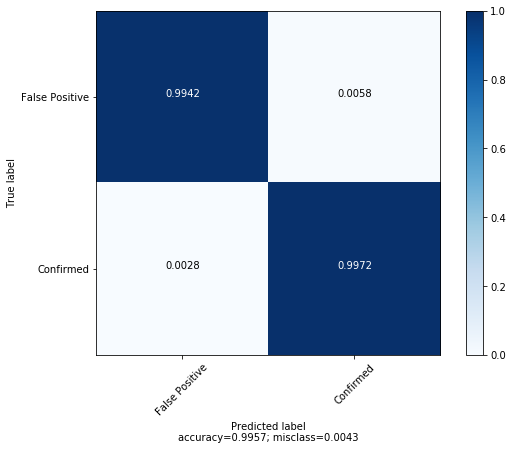

Test


F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.851957   0.86262  0.891688     0.866047       0.956757   
Confirmed       0.851957   0.86262  0.812227     0.866047       0.726562   

                Recall raw  
False Positive    0.834906  
Confirmed         0.920792

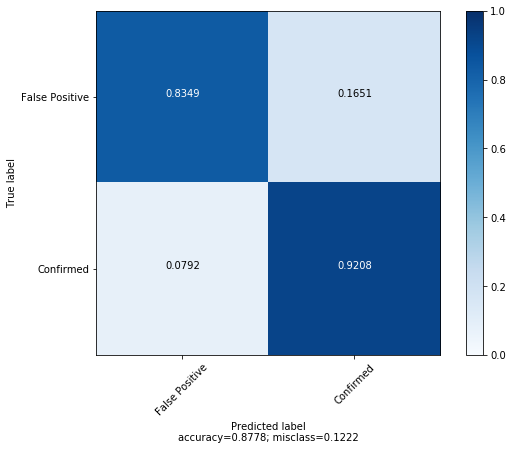

In [38]:
ens_model = RandomForestClassifier(n_jobs=-1, random_state=0, **grid_search.best_params_) 
ens_model.fit(Y_aux_train, exop_train) 

exop_train_pred = ens_model.predict(Y_aux_train)
exop_test_pred = ens_model.predict(Y_aux_test)

print("Train")
aux = calculate_metrics(exop_train, exop_train_pred)
print("Test")
aux = calculate_metrics(exop_test, exop_test_pred) 

#### with Encoder model

In [39]:
time_kepler = np.load(folder_lc+"npy/KOI_LC_time.npy")
process_lc = np.load(folder_lc+'/cleaned/LC_kepler_processed.npy')
N, T = time_kepler.shape
print((N,T))

for i in range(N):
    time_kepler[i], process_lc[i] = generate_representation(time_kepler[i], process_lc[i])

coupled_lc_scaled = []
delta_time = []
for i in range(N):
    mask_nan_aux = np.isnan(process_lc[i])
    lc_i = process_lc[i][~mask_nan_aux]
    time = time_kepler[i][~mask_nan_aux]
    
    std_i = lc_i.std(keepdims=True)
    coupled_lc_scaled.append(lc_i/std_i) #PRE-PROCESS SELECTED
    delta_time.append(np.hstack([[0],np.diff(time)]))    
coupled_lc_scaled = np.asarray(coupled_lc_scaled)
delta_time = np.asarray(delta_time)

max_len = 64482
X_time_aux = keras.preprocessing.sequence.pad_sequences(delta_time,maxlen=max_len, value=0,dtype='float32',padding='post')
X_lc_scaled_aux = keras.preprocessing.sequence.pad_sequences(coupled_lc_scaled,maxlen=max_len, value=0,dtype='float32',padding='post')
print("Shape with padding: ", X_lc_scaled.shape)

X_lc_scaled_aux = np.expand_dims(np.squeeze(X_lc_scaled_aux),axis=-1)
X_time_aux = np.expand_dims(np.squeeze(X_time_aux),axis=-1)

X_enc_aux  = encoder_model.predict(np.concatenate([X_lc_scaled_aux,X_time_aux],axis=2), batch_size=512)
X_aux_train = X_enc_aux[mask_train]
X_aux_test = X_enc_aux[mask_test]
print("Done!")

(8054, 71427)
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423941 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423941 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform samp

New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old le

In [44]:
Y_aux_train_hat = model.predict(X_aux_train, batch_size=1024)
Y_aux_test_hat = model.predict(X_aux_test, batch_size=1024)

Train


F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.996828  0.997016  0.997600     0.997016       0.997258   
Confirmed       0.996828  0.997016  0.996056     0.997016       0.996618   

                Recall raw  
False Positive    0.997942  
Confirmed         0.995495

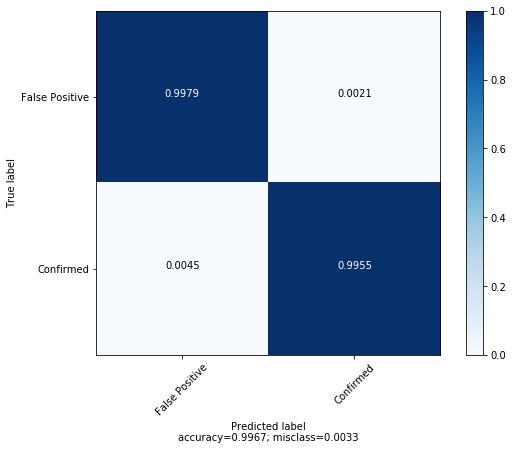

Test


F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.615112  0.640256  0.713486     0.649999       0.774586   
Confirmed       0.615112  0.640256  0.516738     0.649999       0.456061   

                Recall raw  
False Positive    0.661321  
Confirmed         0.596040

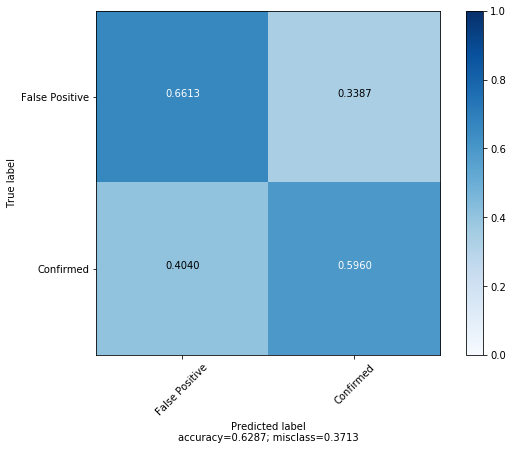

In [45]:
ens_model = RandomForestClassifier(n_jobs=-1, random_state=0, **grid_search.best_params_) 
ens_model.fit(Y_aux_train_hat, exop_train) 

exop_train_pred = ens_model.predict(Y_aux_train_hat)
exop_test_pred = ens_model.predict(Y_aux_test_hat)

print("Train")
aux = calculate_metrics(exop_train, exop_train_pred)
print("Test")
aux = calculate_metrics(exop_test, exop_test_pred) 

In [ ]:
#https://arxiv.org/pdf/1609.03499.pdf -- dilated causal conv..
#https://github.com/peustr/wavenet/blob/master/wavenet/model.py
#https://github.com/philipperemy/keras-tcn

In [ ]:
### medir MSE diviendo por el error de la medicion?? (pareciera ser lo mas correcto?)